In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_theme()

## Load Datasets

In [3]:
monthly_1990 = pd.read_csv('./data/monthly_1990.csv', index_col='date')
qtr_2000 = pd.read_csv('./data/quarterly_2000.csv', index_col='date')
hp_idx = pd.read_csv('./data/hpi_monthly.csv', index_col='date')
hp_idx_qtr = pd.read_csv('./data/hpi_quarterly.csv', index_col='date')

In [4]:
datasets = [monthly_1990, qtr_2000, hp_idx, hp_idx_qtr]

for d in datasets:
    d.index = pd.to_datetime(d.index).normalize()

In [5]:
## rename quarterly index

hp_idx_qtr.rename(columns={'hp_idx': 'hp_idx_qtr'}, inplace=True)

In [6]:
x_mnth = monthly_1990.join(hp_idx, how='inner')

In [7]:
x_mnth

spend  permits  permit_val  starts  completions  manufactured  \
date                                                                         
1993-01-01  194150      989    5383.028    1091        975.0           248   
1993-02-01  194689      953    5844.533    1063       1043.0           248   
1993-03-01  190185      881    8227.729     950        983.0           241   
1993-04-01  198296      922    8918.858    1110       1067.0           241   
1993-05-01  198835      911    8320.702    1128        973.0           240   
...            ...      ...         ...     ...          ...           ...   
2020-08-01  638430     1055   21995.756    1023        895.0            95   
2020-09-01  657613     1121   23179.135    1105        933.0            96   
2020-10-01  677725     1141   23846.574    1162        898.0           100   
2020-11-01  697825     1155   19839.048    1182        913.0           101   
2020-12-01  719089     1233   22196.074    1315        958.0           104   

            new_for_sale  months_supply  emratio  pop_level        gdp  \
date                                                                     
1993-01-01           265            5.4     61.4     193962  99.759963   
1993-02-01           263            5.3     61.4     194108  99.679238   
1993-03-01           268            5.4     61.5     194248  99.598357   
1993-04-01           270            4.7     61.5     194398  99.525442   
1993-05-01           273            5.3     61.7     194549  99.466172   
...                  ...            ...      ...        ...        ...   
2020-08-01           286            3.5     56.5     260558  96.957495   
2020-09-01           286            2.5     56.6     260742  97.144271   
2020-10-01           284            3.5     57.4     260925  97.335974   
2020-11-01           290            4.0     57.4     261085  97.545301   
2020-12-01           299            3.8     57.4     261230  97.920930   

            mortgage_rate  fed_fund_rate  disp_income  pm_save  \
date                                                             
1993-01-01         7.9925           2.66       7237.6    425.6   
1993-02-01         7.6825           3.25       7271.8    441.5   
1993-03-01         7.4950           3.65       7249.2    439.0   
1993-04-01         7.4720           3.31       7286.8    436.4   
1993-05-01         7.4650           3.01       7276.3    415.8   
...                   ...            ...          ...      ...   
2020-08-01         2.9350           0.10      15553.9   2598.4   
2020-09-01         2.8900           0.09      15643.4   2506.2   
2020-10-01         2.8340           0.09      15568.4   2370.9   
2020-11-01         2.7650           0.09      15366.5   2239.3   
2020-12-01         2.6840           0.09      15393.8   2426.2   

            consump_durable  new_sold   hp_idx  
date                                            
1993-01-01            538.1       596   76.784  
1993-02-01            524.2       604   76.838  
1993-03-01            521.2       602   76.868  
1993-04-01            543.0       701   76.937  
1993-05-01            552.0       626   77.037  
...                     ...       ...      ...  
2020-08-01           1754.4      1036  222.539  
2020-09-01           1774.6       991  225.793  
2020-10-01           1794.0      1001  229.403  
2020-11-01           1763.7       851  232.673  
2020-12-01           1719.9       871  235.700  

[348 rows x 18 columns]

In [8]:
x_qtr = qtr_2000.join(hp_idx_qtr, how='inner')

In [9]:
x_qtr

owner_vacancy  rent_vacancy  week_earning  delinquent_rate  \
date                                                                     
2000-01-01            1.6           7.9           603             1.95   
2000-04-01            1.5           8.0           606             1.97   
2000-07-01            1.6           8.2           611             2.09   
2000-10-01            1.6           7.8           614             2.23   
2001-01-01            1.5           8.2           620             2.34   
...                   ...           ...           ...              ...   
2020-10-01            1.0           6.5          1029             2.73   
2021-01-01            0.9           6.8          1040             2.68   
2021-04-01            0.9           6.2          1048             2.48   
2021-07-01            0.9           5.8          1068             2.31   
2021-10-01            0.9           5.6          1069             2.28   

                  hor  hp_idx_qtr  
date                               
2000-01-01  67.100000  101.339333  
2000-04-01  67.200000  103.674333  
2000-07-01  67.700000  105.786000  
2000-10-01  67.500000  108.274667  
2001-01-01  67.500000  110.484667  
...               ...         ...  
2020-10-01  65.822503  232.592000  
2021-01-01  65.600000  242.141667  
2021-04-01  65.400000  254.633000  
2021-07-01  65.400000  266.878333  
2021-10-01  65.500000  276.591000  

[88 rows x 6 columns]

### EDA

In [10]:
x_mnth.describe()

spend      permits    permit_val       starts  completions  \
count     348.000000   348.000000    348.000000   348.000000   348.000000   
mean   388427.977011   978.086207  13436.704716  1021.948276  1008.341954   
std    131817.306373   350.756496   5004.263997   364.981422   350.616782   
min    190185.000000   337.000000   4187.117000   353.000000   368.000000   
25%    262888.500000   678.750000   9384.458500   717.250000   713.500000   
50%    365905.000000  1014.500000  12819.002500  1106.500000  1059.000000   
75%    507872.750000  1232.250000  16737.504500  1277.750000  1262.000000   
max    719089.000000  1798.000000  28099.586000  1823.000000  1911.000000   

       manufactured  new_for_sale  months_supply     emratio      pop_level  \
count    348.000000    348.000000     348.000000  348.000000     348.000000   
mean     163.853448    309.563218       5.547989   61.448563  228248.660920   
std      110.566859     97.260866       1.786734    2.226594   20452.252824   
min       40.000000    142.000000       2.500000   51.300000  193962.000000   
25%       75.000000    256.250000       4.200000   59.550000  211956.500000   
50%      113.000000    300.000000       5.100000   62.300000  228791.500000   
75%      249.500000    342.000000       6.300000   63.100000  246221.250000   
max      390.000000    570.000000      12.200000   64.700000  261230.000000   

              gdp  mortgage_rate  fed_fund_rate   disp_income      pm_save  \
count  348.000000     348.000000     348.000000    348.000000   348.000000   
mean    99.924844       5.770086       2.611494  11060.189080   690.200575   
std      1.154711       1.608015       2.242938   2267.430612   571.627593   
min     91.580035       2.684000       0.040000   7236.400000   193.400000   
25%     99.569831       4.195000       0.200000   9406.300000   379.075000   
50%     99.947313       5.930250       2.040000  11196.000000   453.250000   
75%    100.512188       7.067500       5.055000  12495.975000   938.875000   
max    101.829671       9.198000       7.800000  17170.700000  6392.500000   

       consump_durable     new_sold      hp_idx  
count       348.000000   348.000000  348.000000  
mean       1056.994540   721.683908  141.397727  
std         273.791779   263.823162   42.368958  
min         521.200000   270.000000   76.784000  
25%         903.225000   504.750000  102.723250  
50%        1077.200000   703.000000  144.786500  
75%        1197.700000   893.000000  175.919500  
max        1794.000000  1389.000000  235.700000

In [11]:
x_qtr.describe()

owner_vacancy  rent_vacancy  week_earning  delinquent_rate        hor  \
count      88.000000     88.000000     88.000000        88.000000  88.000000   
mean        1.905682      8.484091    800.806818         4.641250  66.426392   
std         0.520909      1.455381    124.448379         3.249938   1.836107   
min         0.900000      5.600000    603.000000         1.410000  62.900000   
25%         1.600000      7.000000    696.750000         2.145000  64.800000   
50%         1.800000      8.600000    789.500000         2.915000  66.900000   
75%         2.225000      9.800000    881.500000         7.152500  68.000000   
max         2.900000     11.100000   1069.000000        11.500000  69.200000   

       hp_idx_qtr  
count   88.000000  
mean   166.134367  
std     36.548143  
min    101.339333  
25%    141.844500  
50%    163.591667  
75%    184.103583  
max    276.591000

In [12]:
def detect_outlier(df_in:pd.DataFrame):
    
    df_out = df_in.copy()
    
    for c in df_out.columns:
        q1 = df_out[c].quantile(0.25)
        q3 = df_out[c].quantile(0.75)
        
        iqr = q3 - q1
        a, b = q1-1.5*iqr, q3+1.5*iqr
        
        df_out['out_' + c] = (df_out[c] < a) | (df_out[c] > b)
        
    return df_out
        

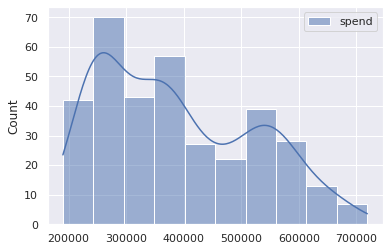

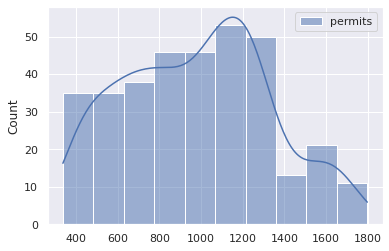

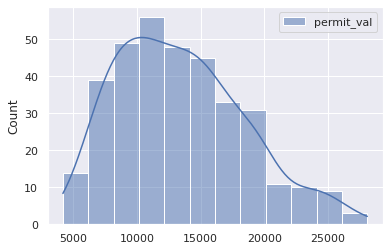

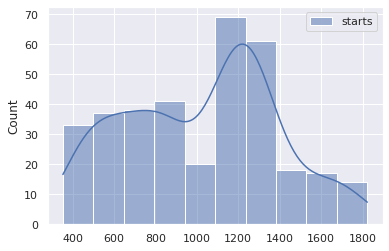

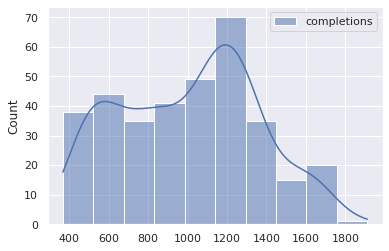

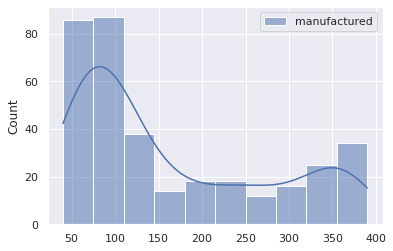

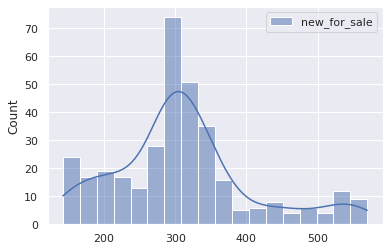

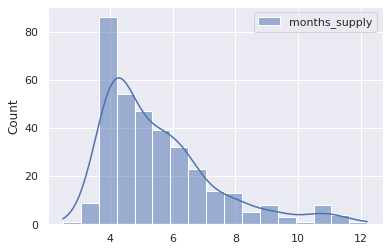

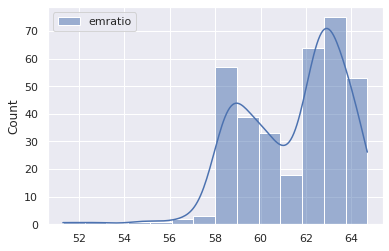

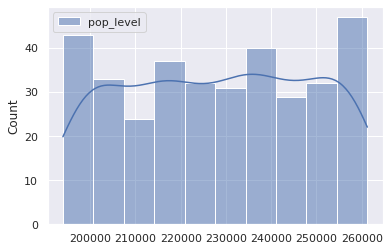

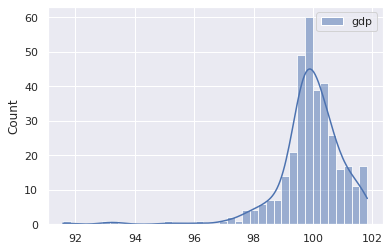

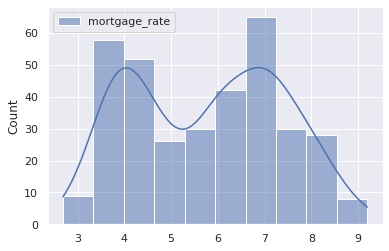

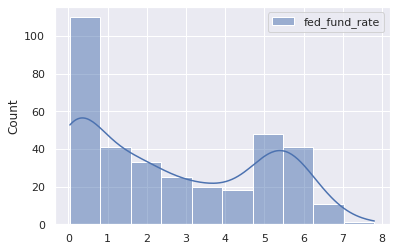

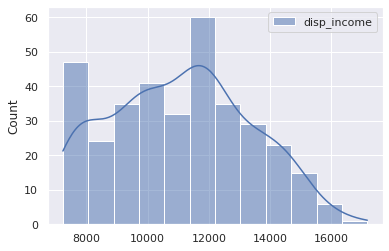

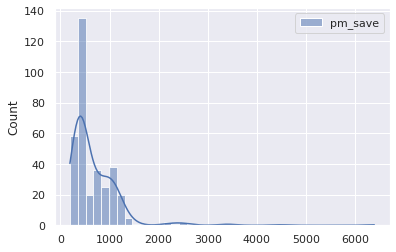

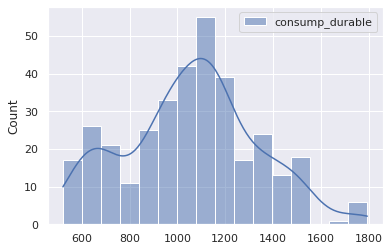

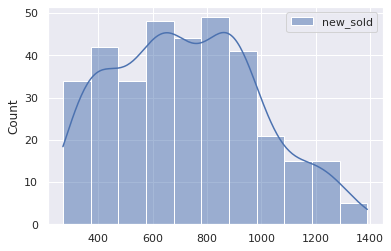

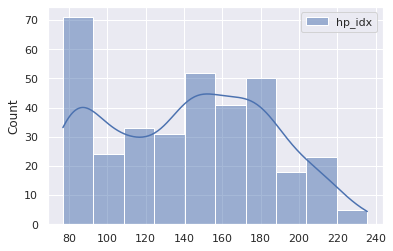

In [13]:
plt.close('all')
for col in x_mnth.columns:
    f, ax = plt.subplots()
    sns.histplot(x_mnth[[col]], ax=ax, kde=True)


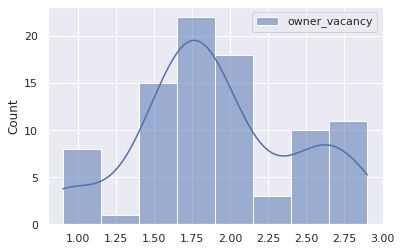

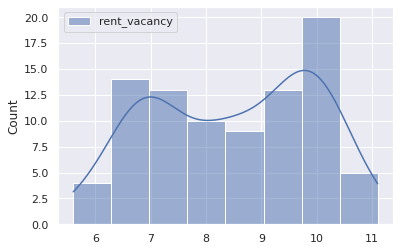

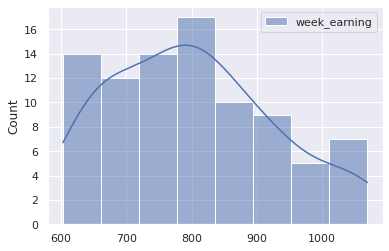

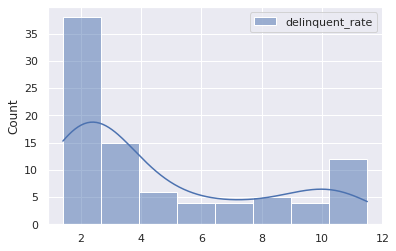

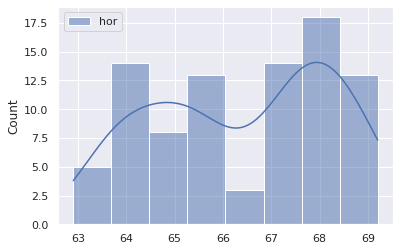

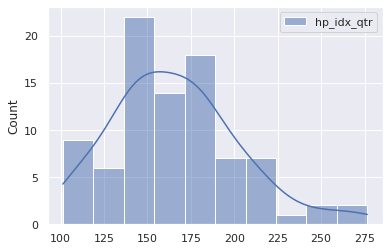

In [14]:
plt.close('all')
for col in x_qtr.columns:
    f, ax = plt.subplots()
    sns.histplot(x_qtr[[col]], ax=ax, kde=True)

In [15]:
x_mnth_out = detect_outlier(x_mnth)

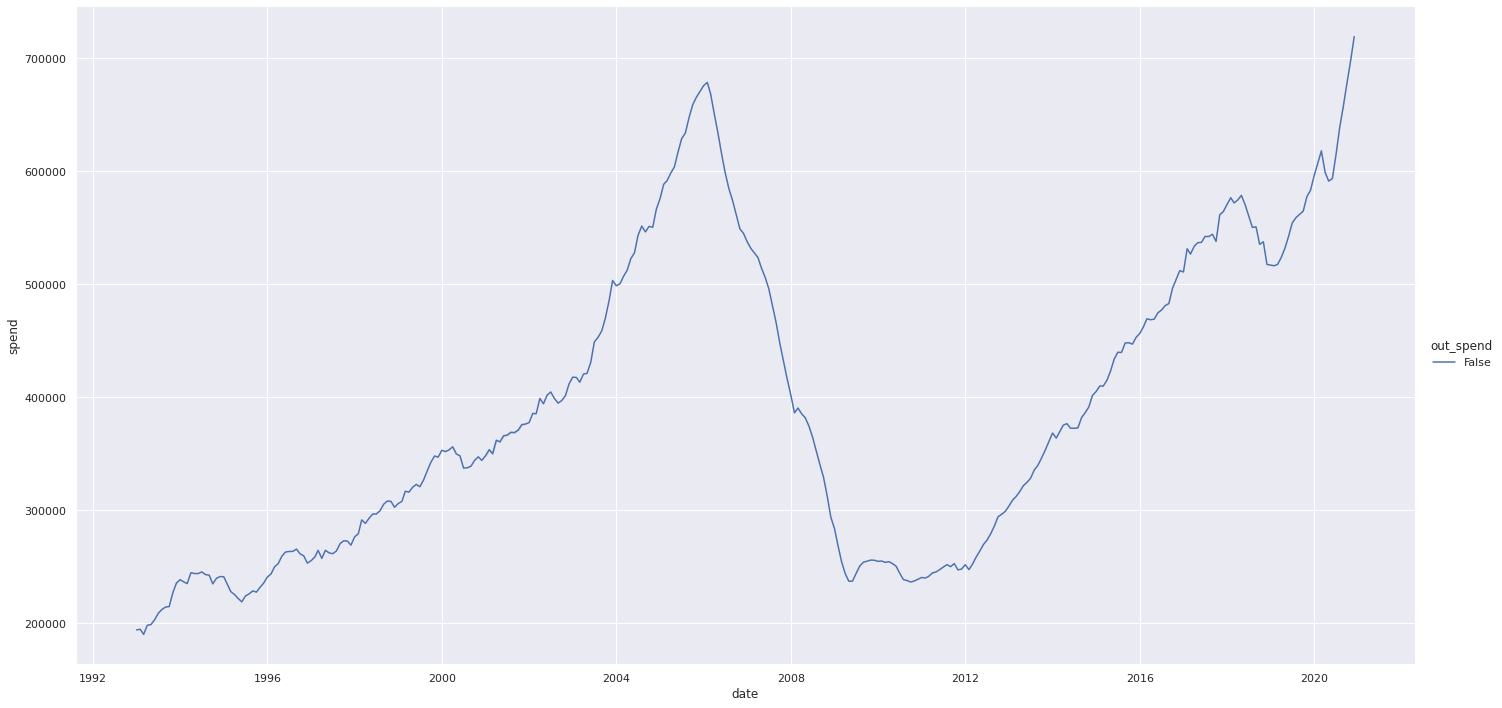

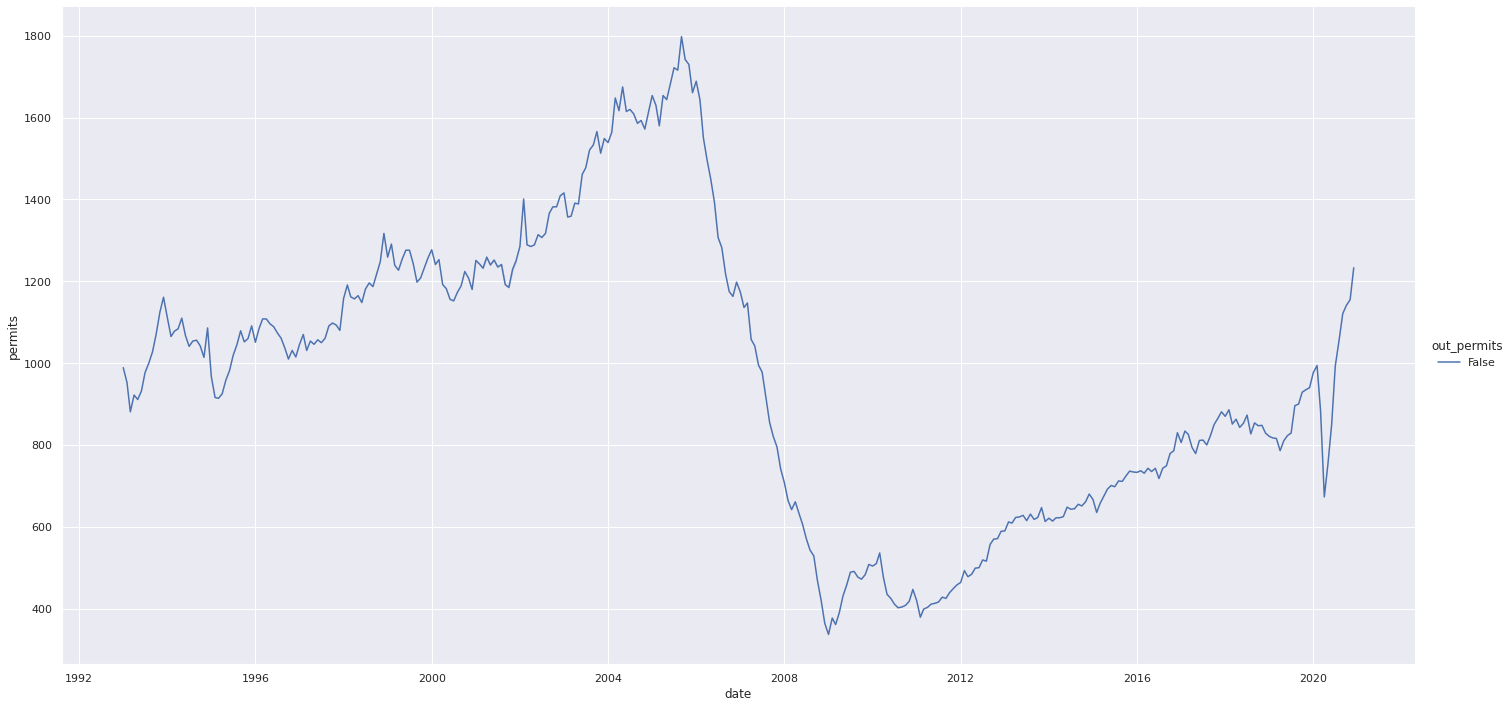

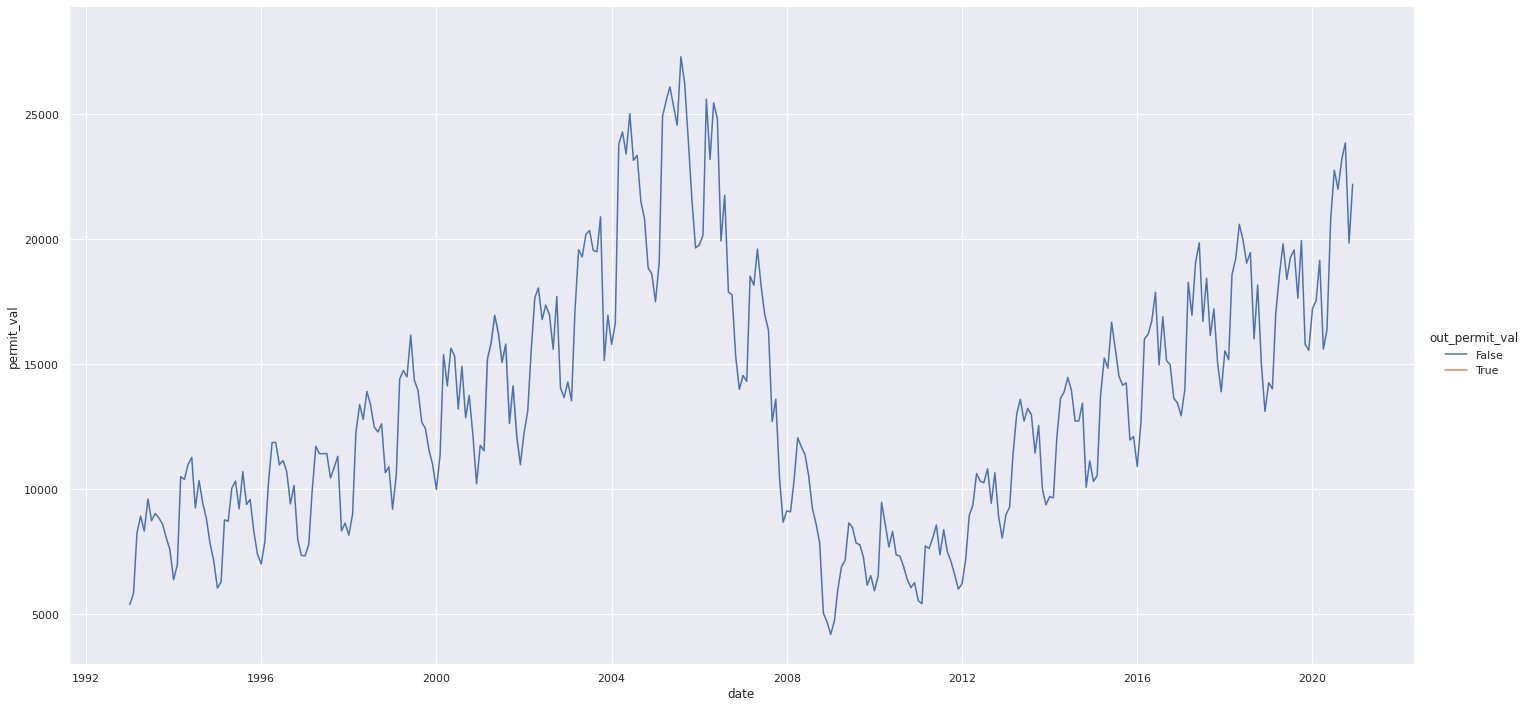

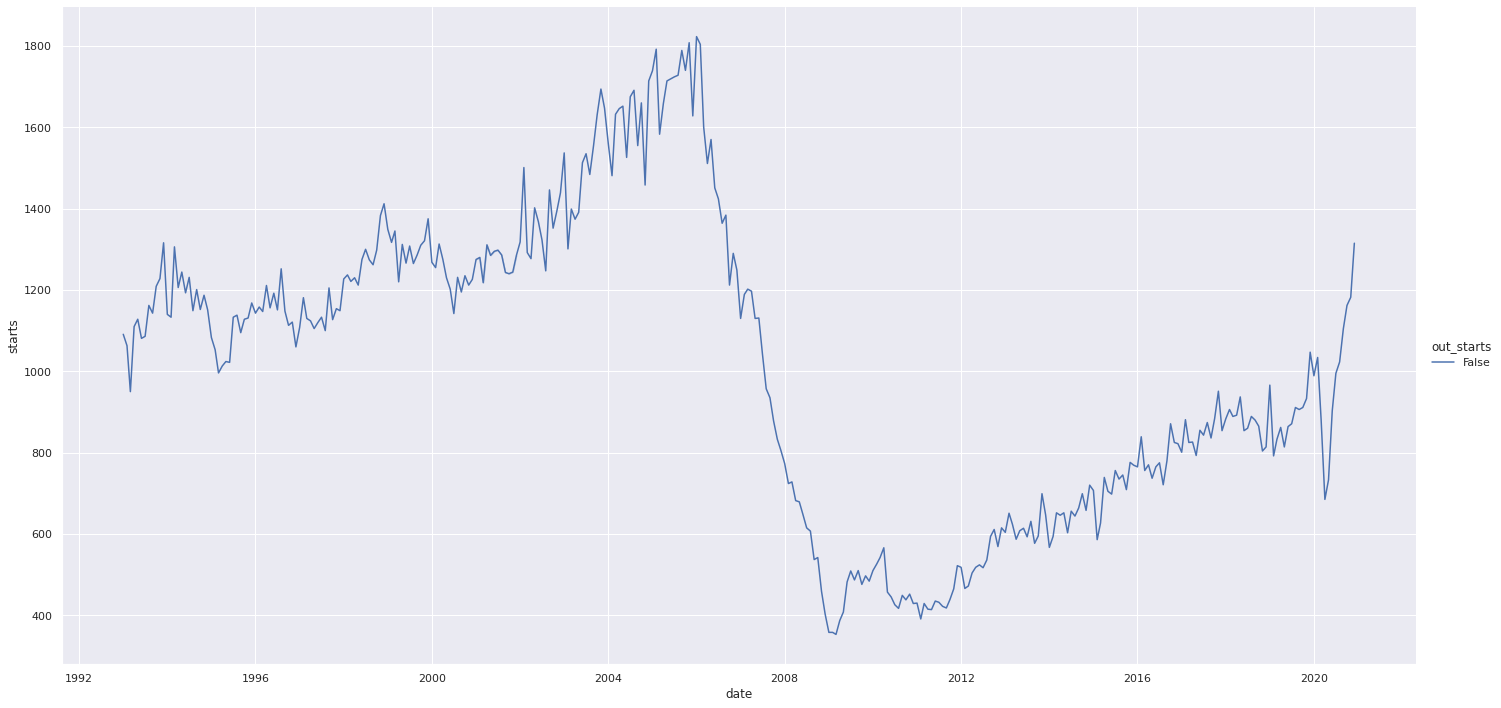

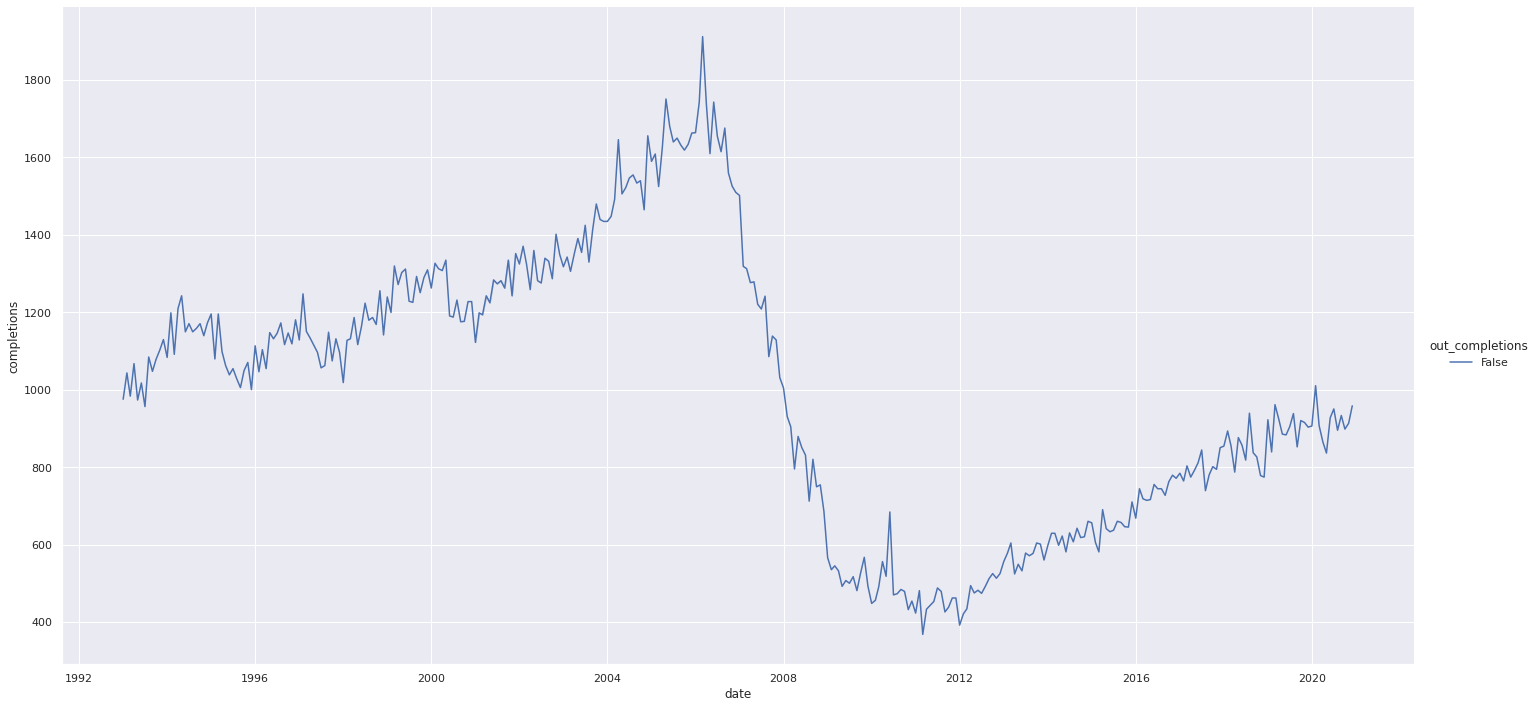

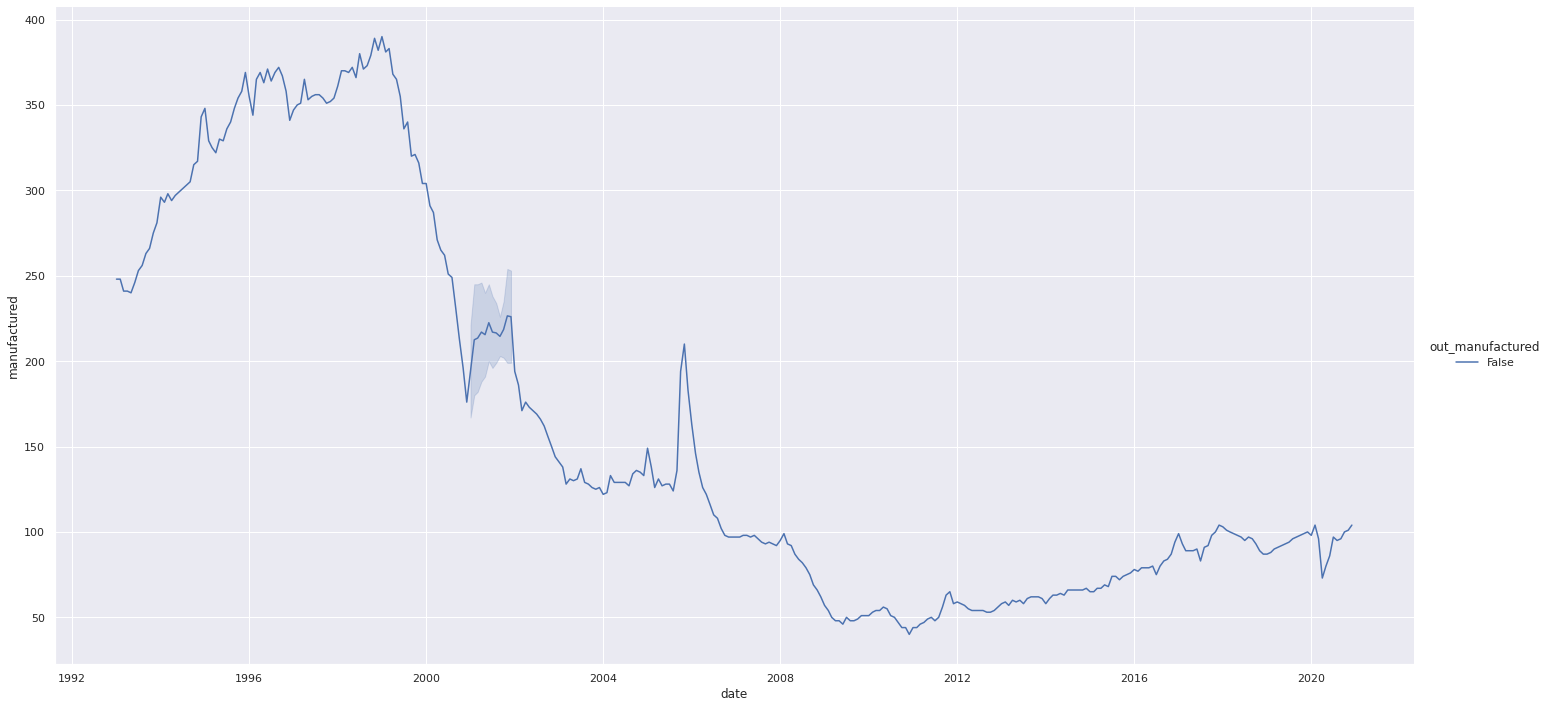

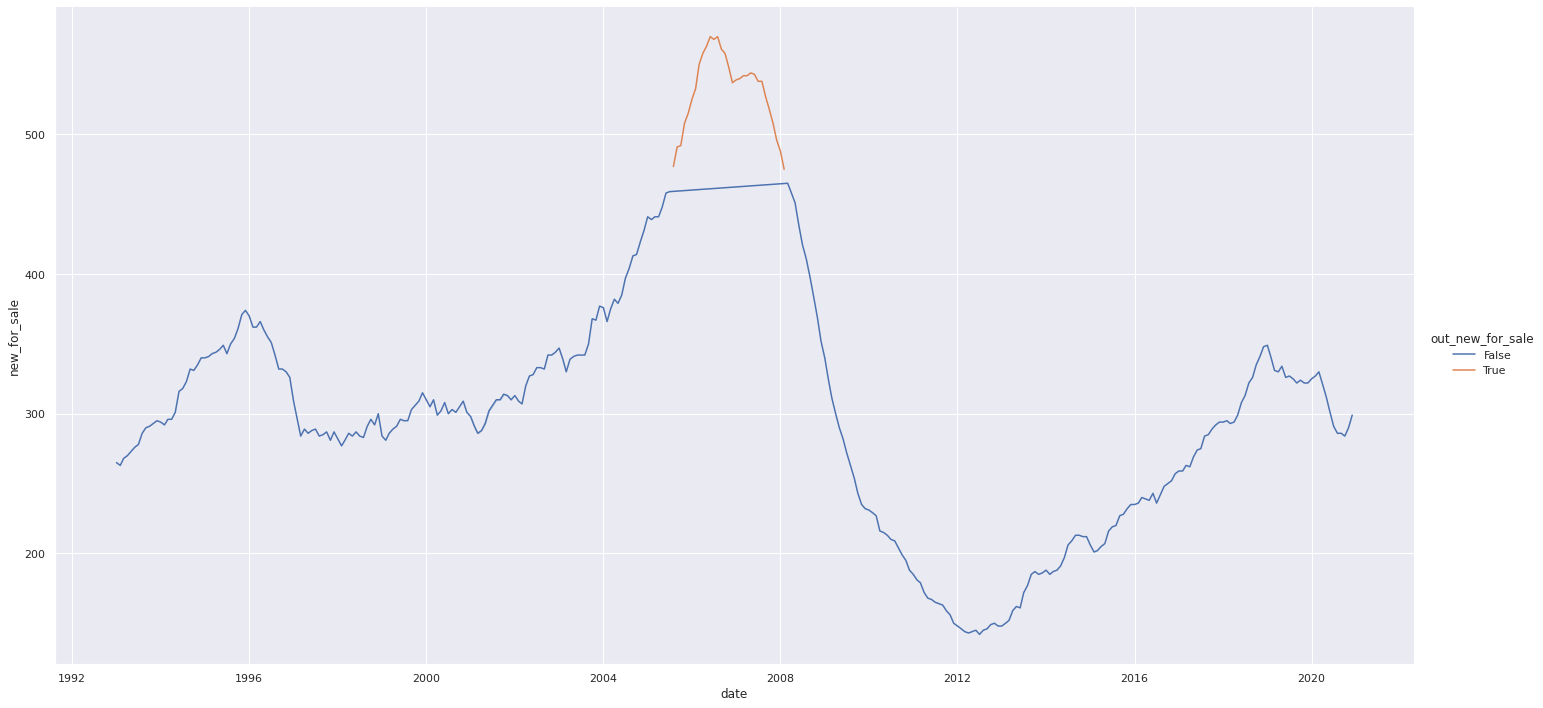

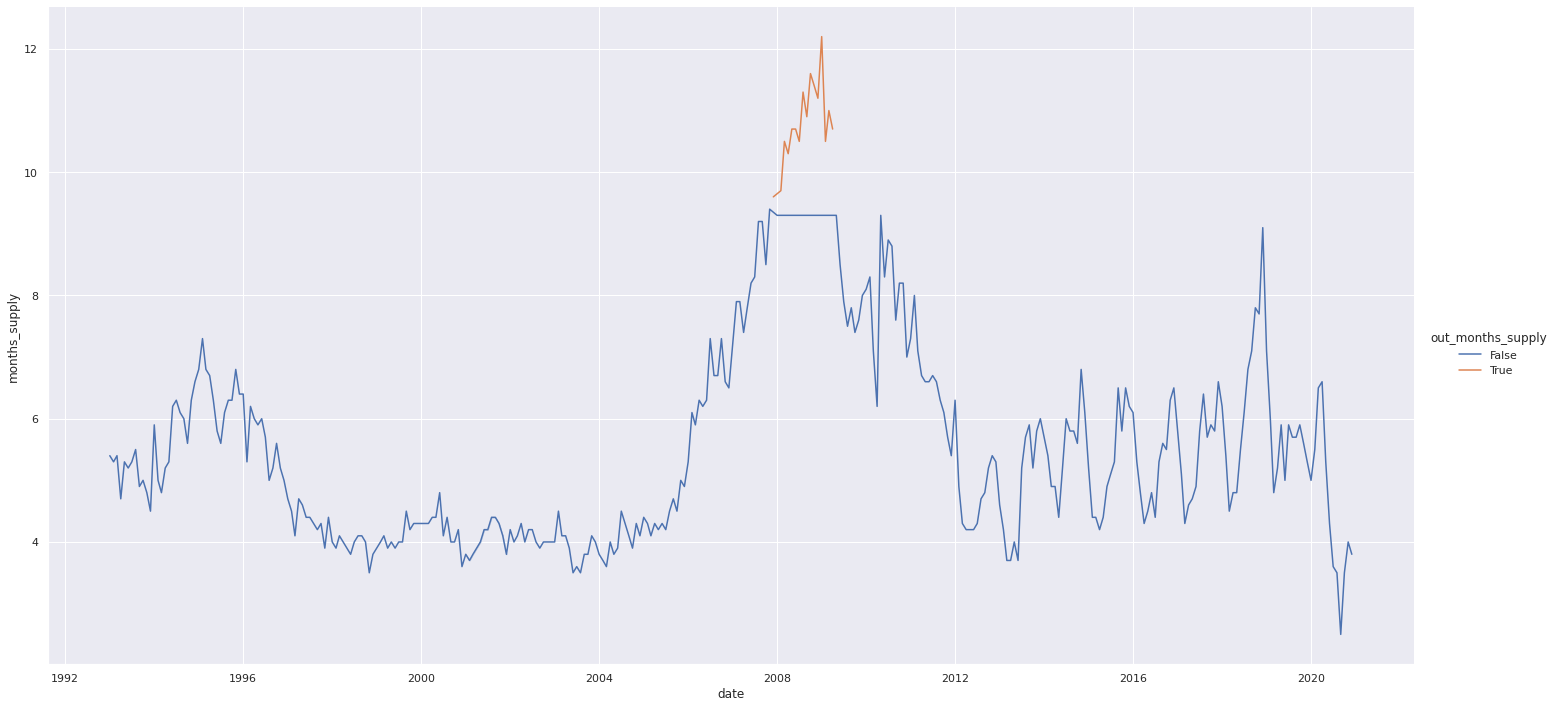

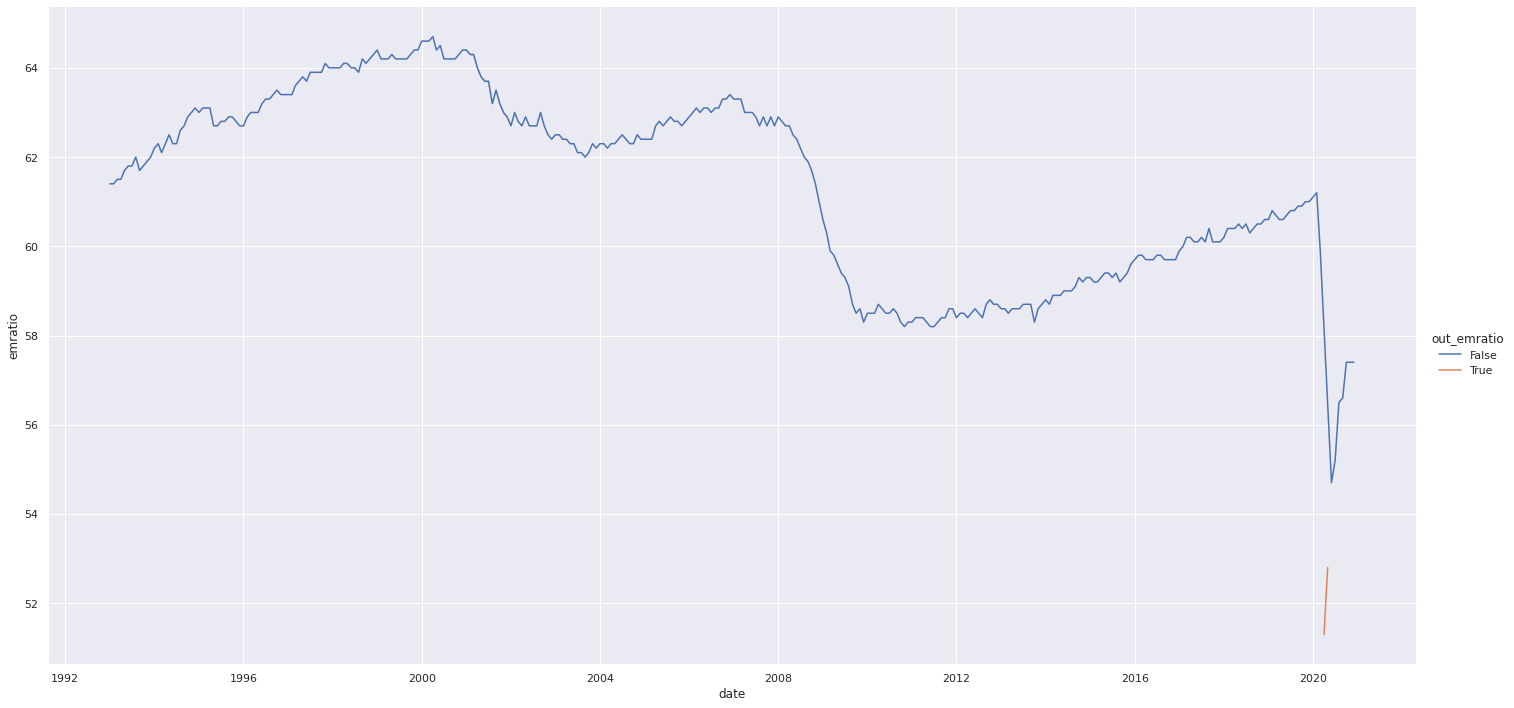

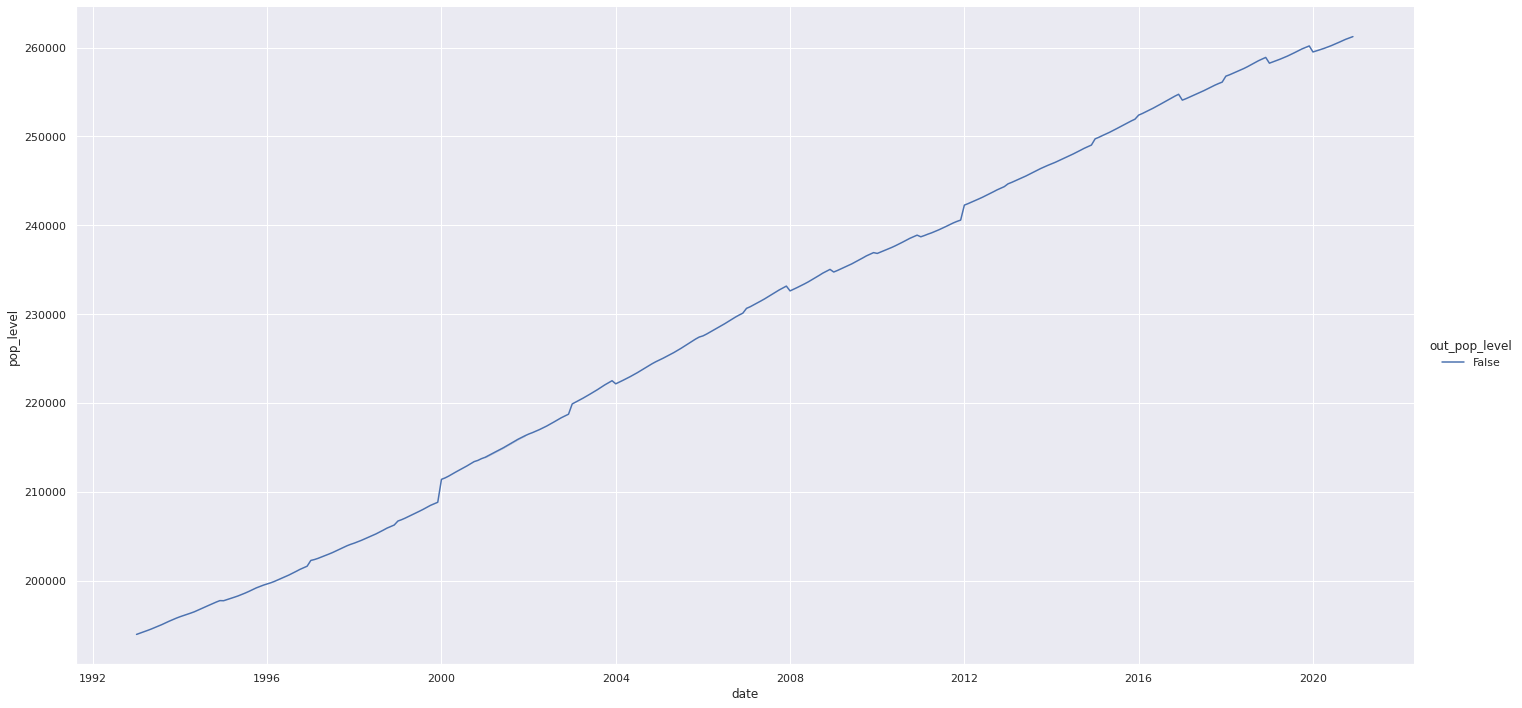

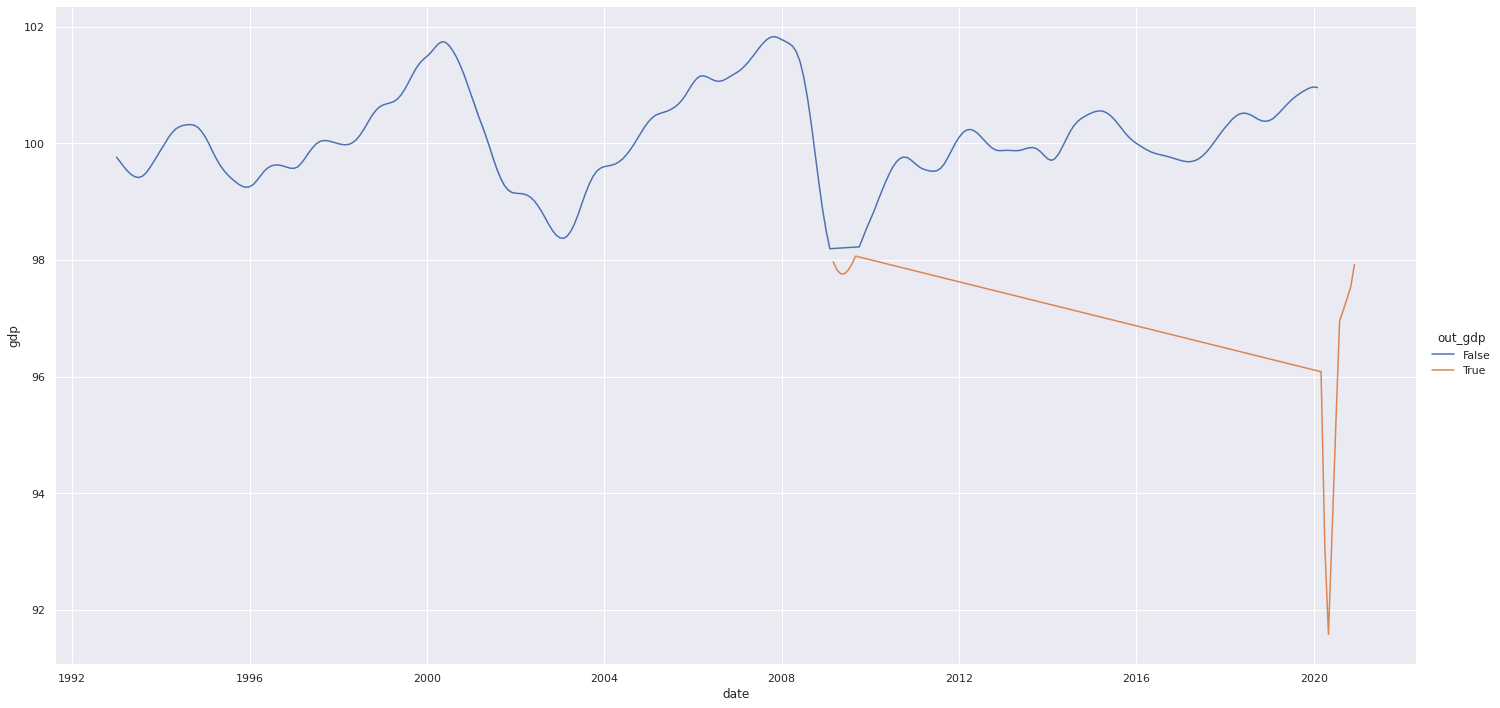

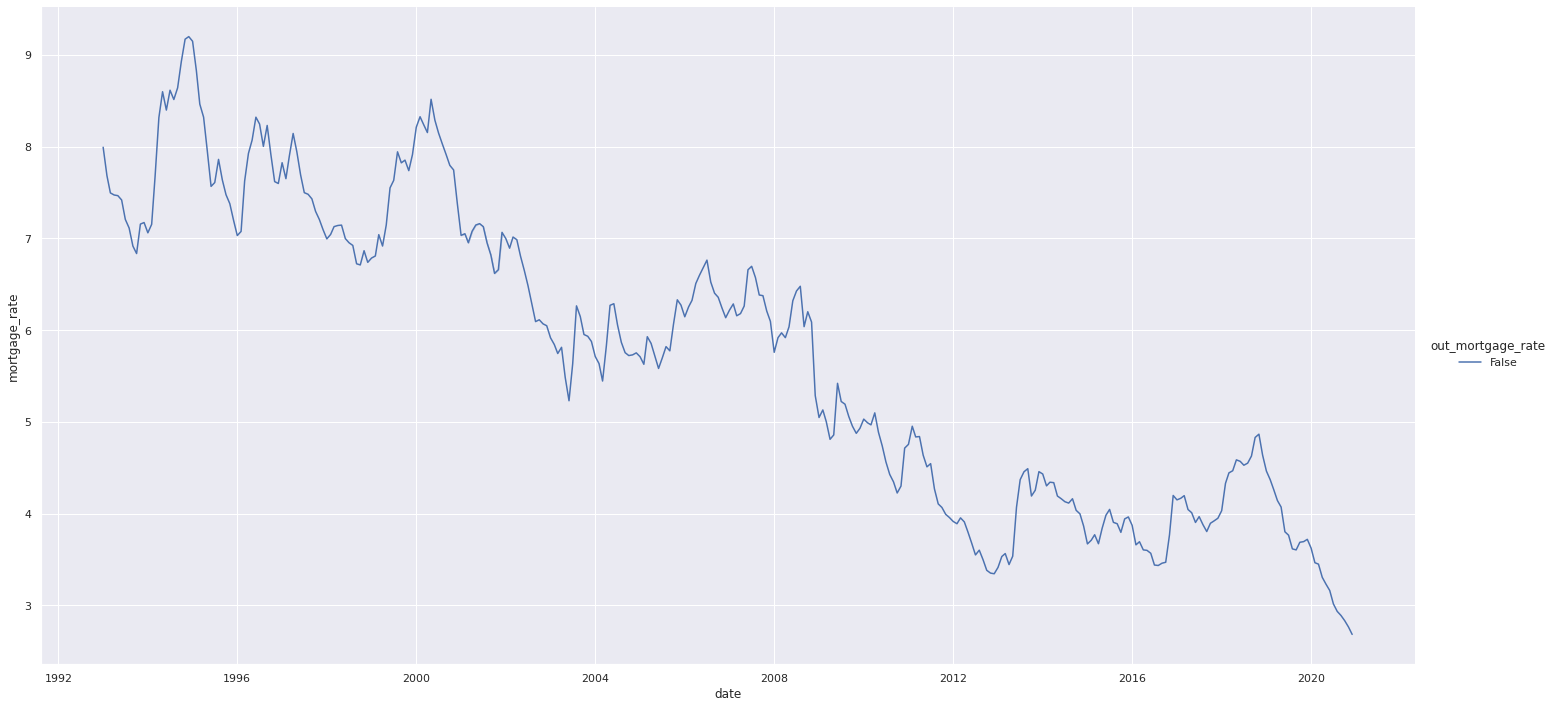

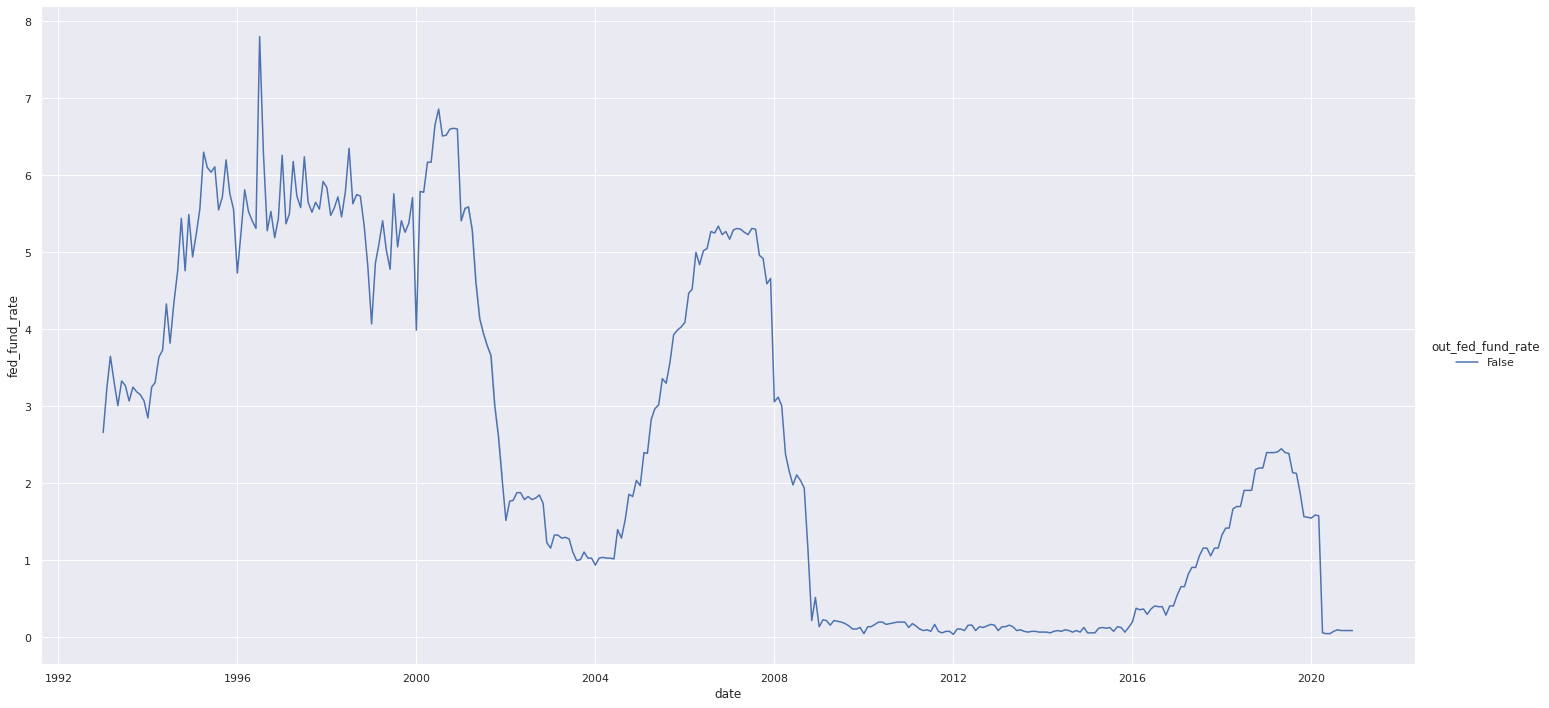

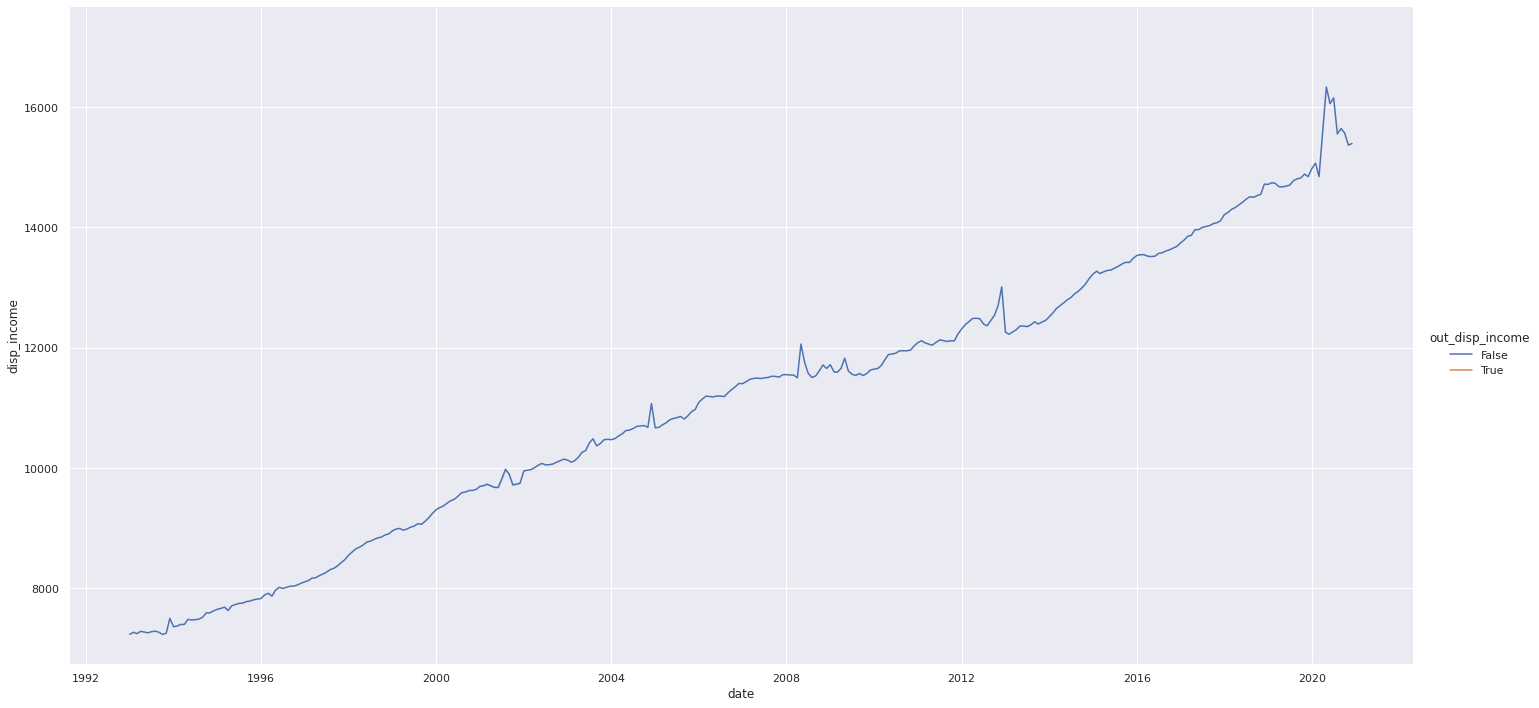

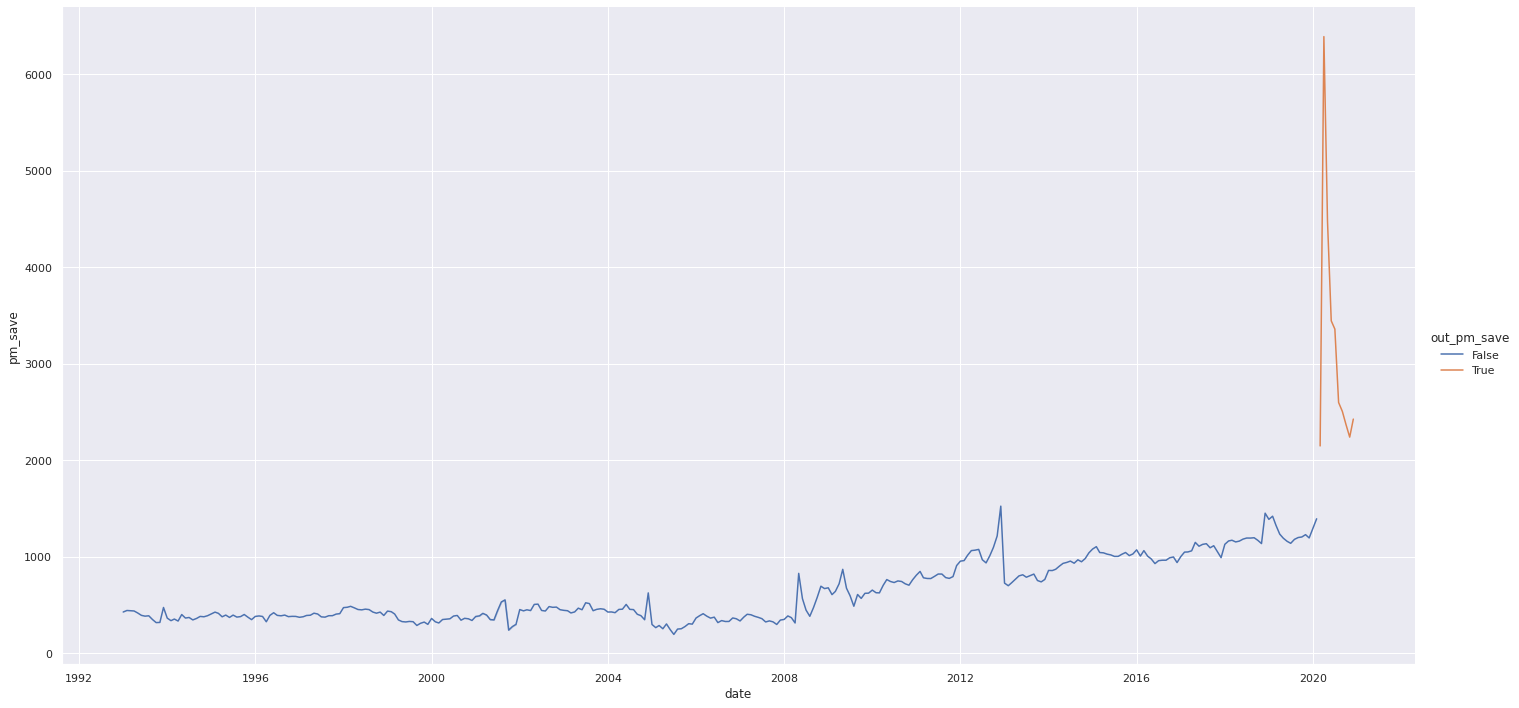

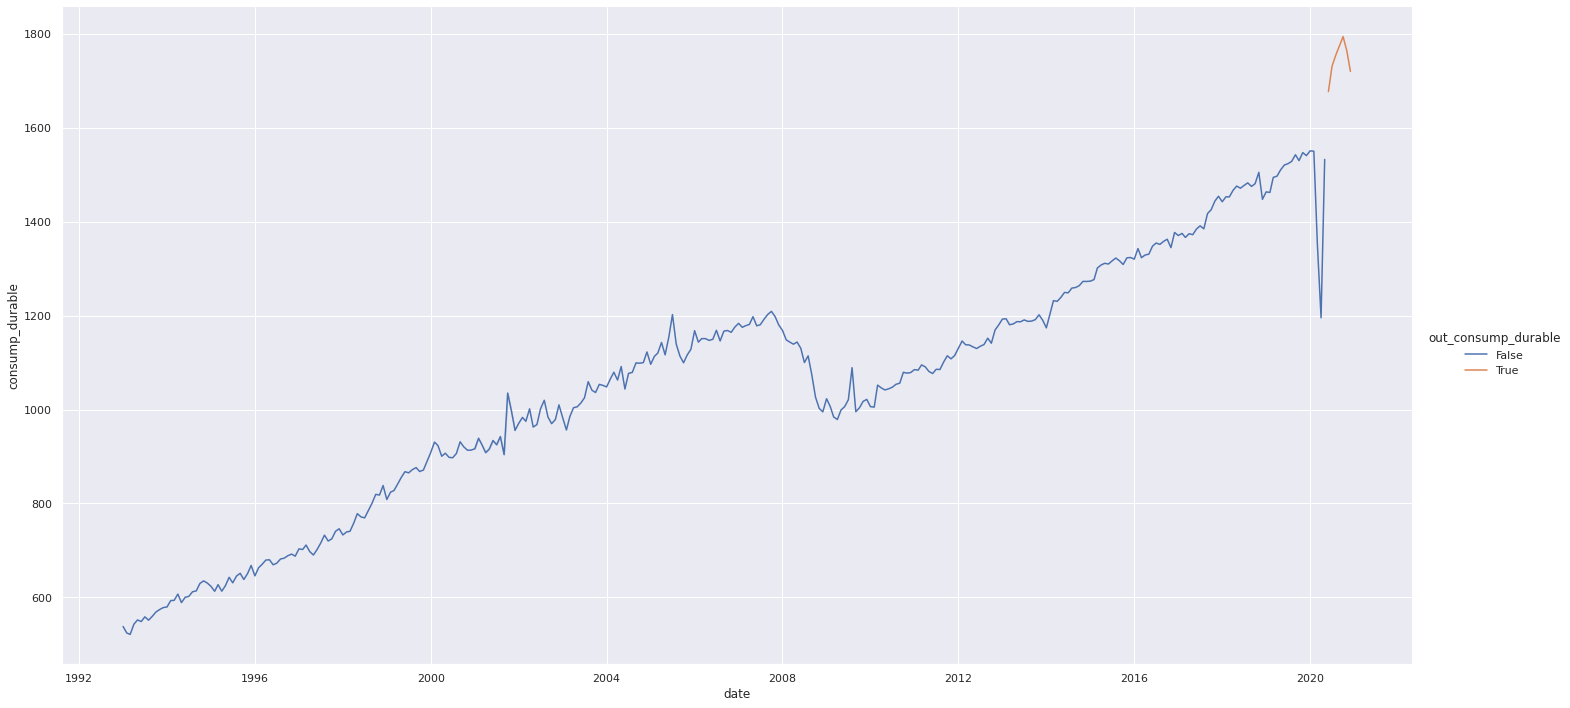

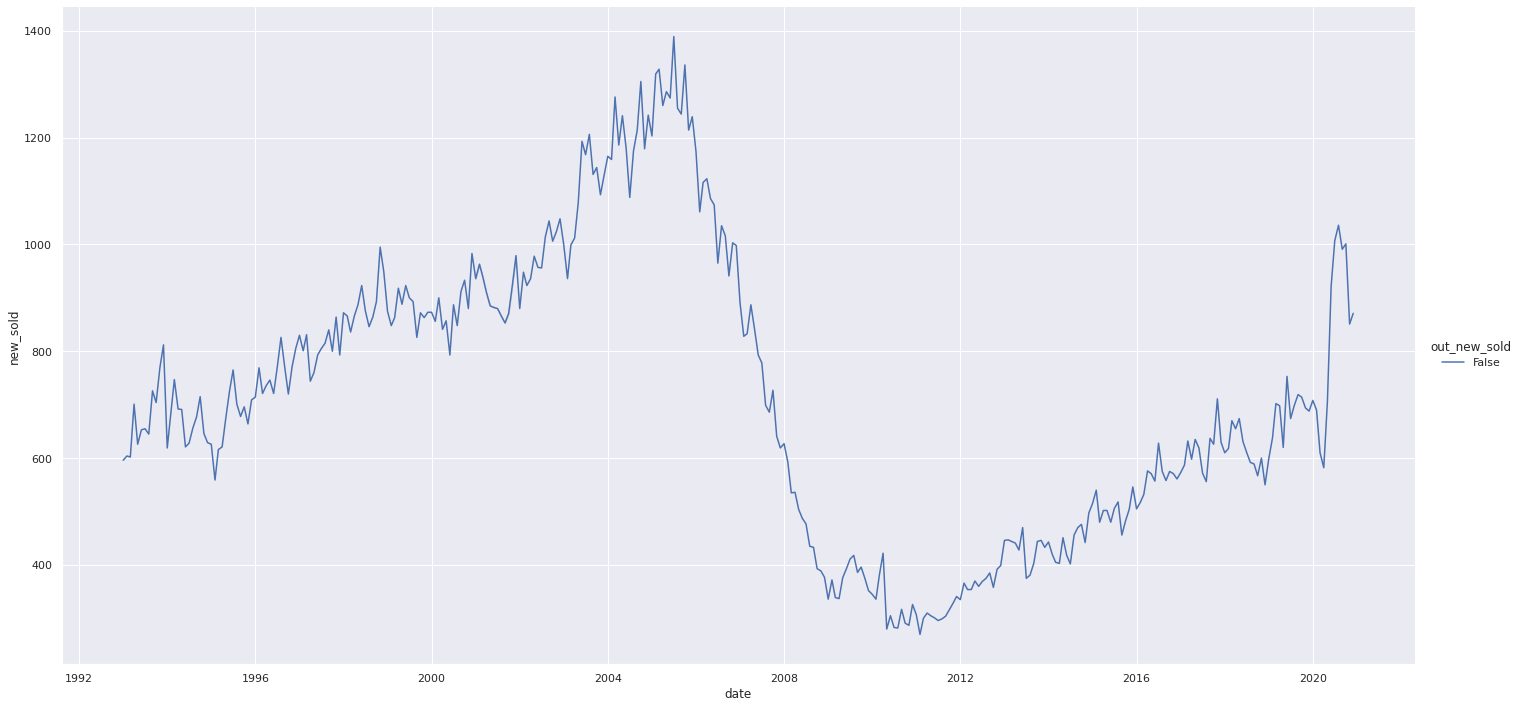

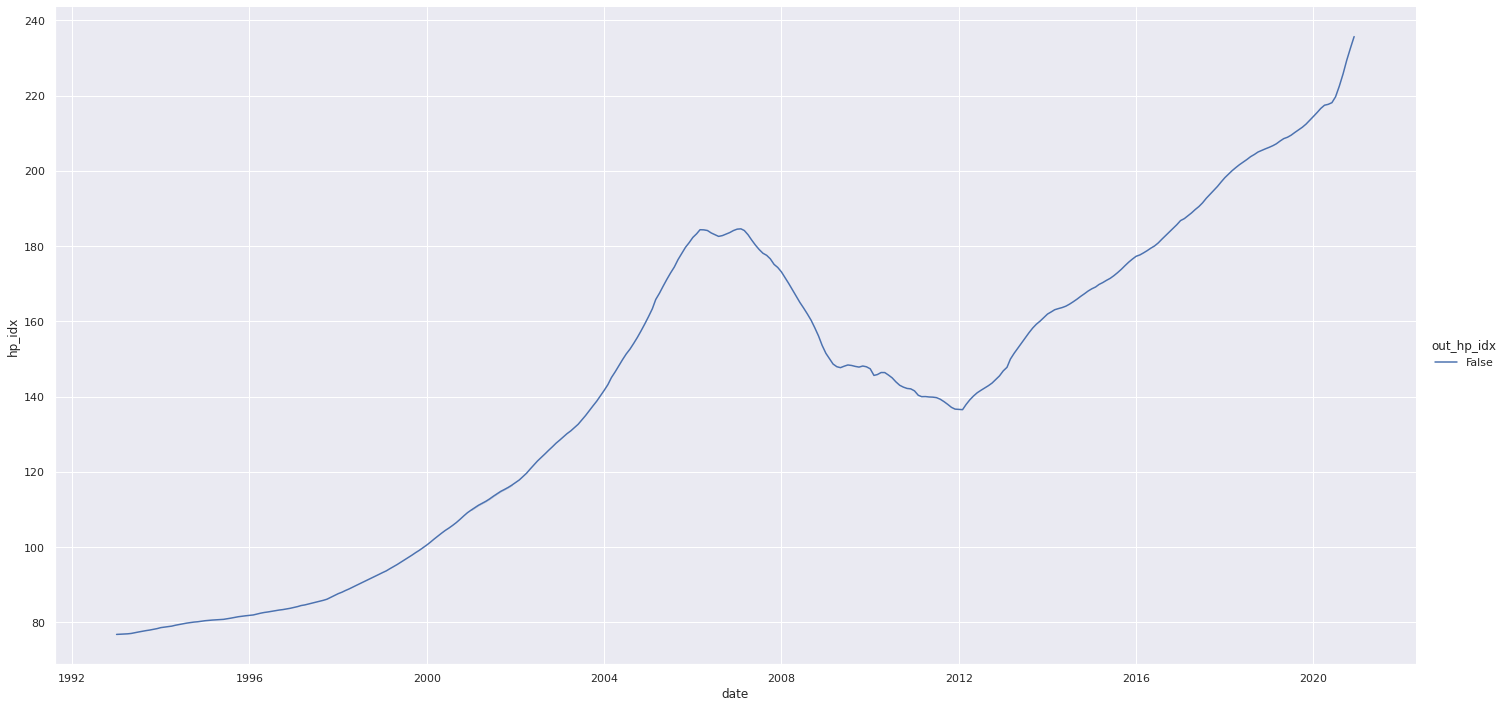

In [16]:
plt.close('all')
for col in x_mnth.columns:
    sns.relplot(data=x_mnth_out.reset_index(), x='date', y=col, hue='out_' + col, kind='line', height=10, aspect=2)

In [17]:
x_qtr_out = detect_outlier(x_qtr)

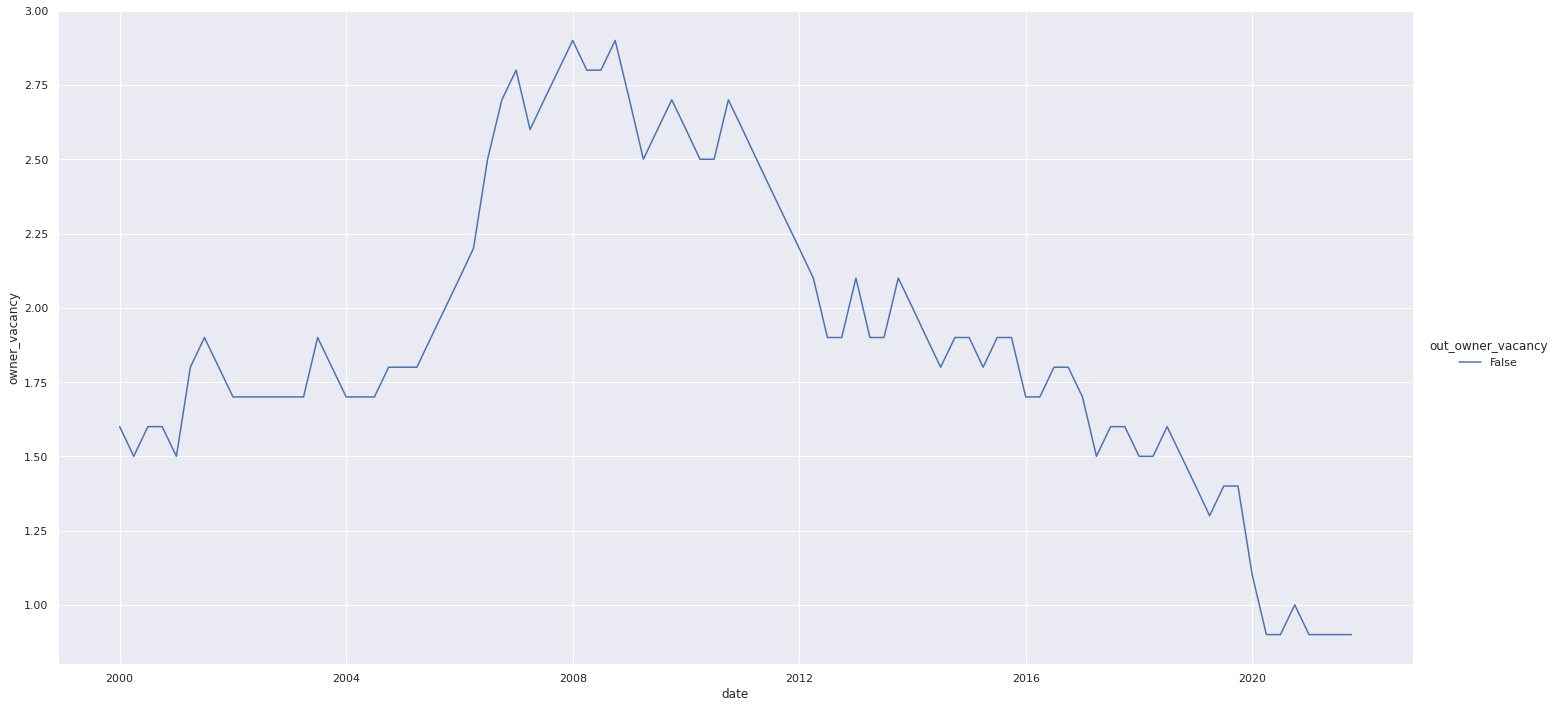

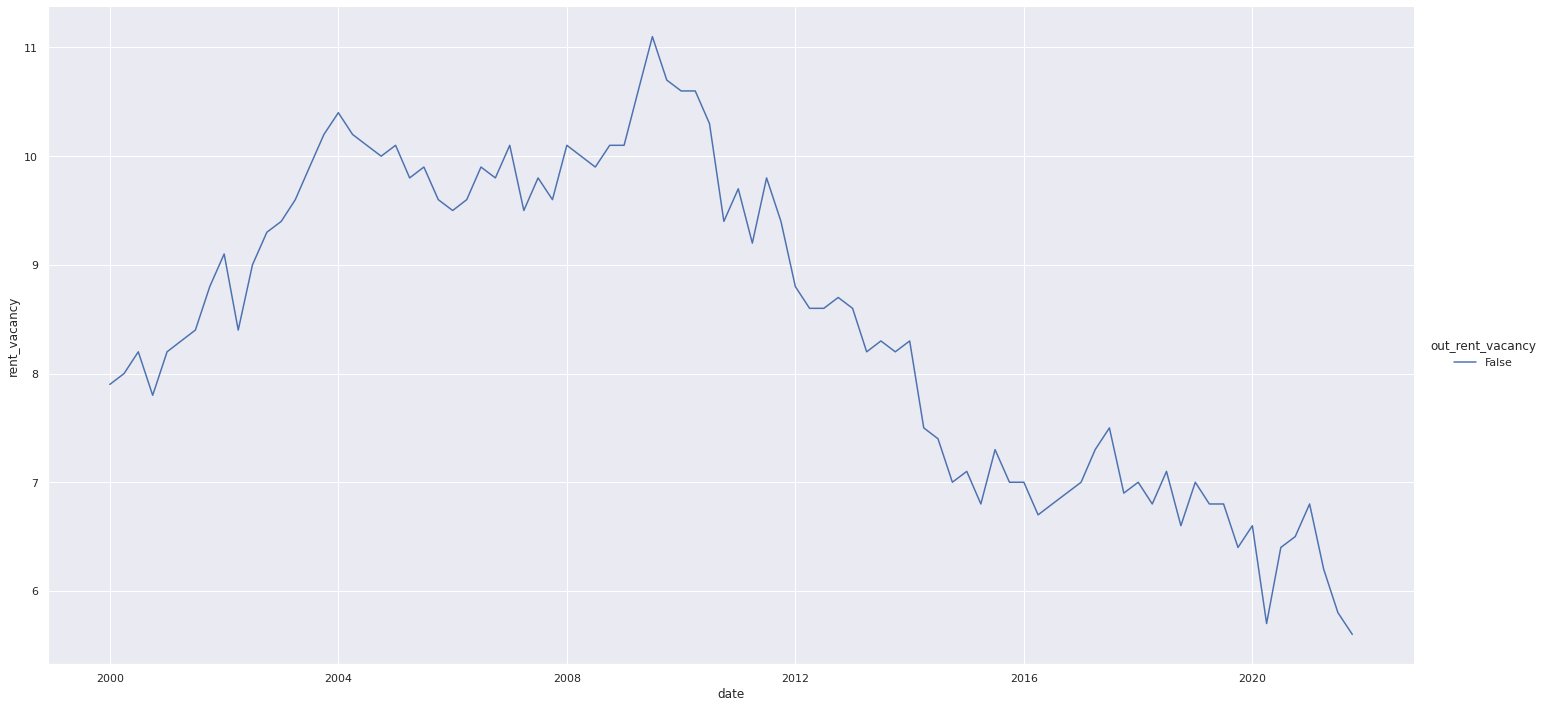

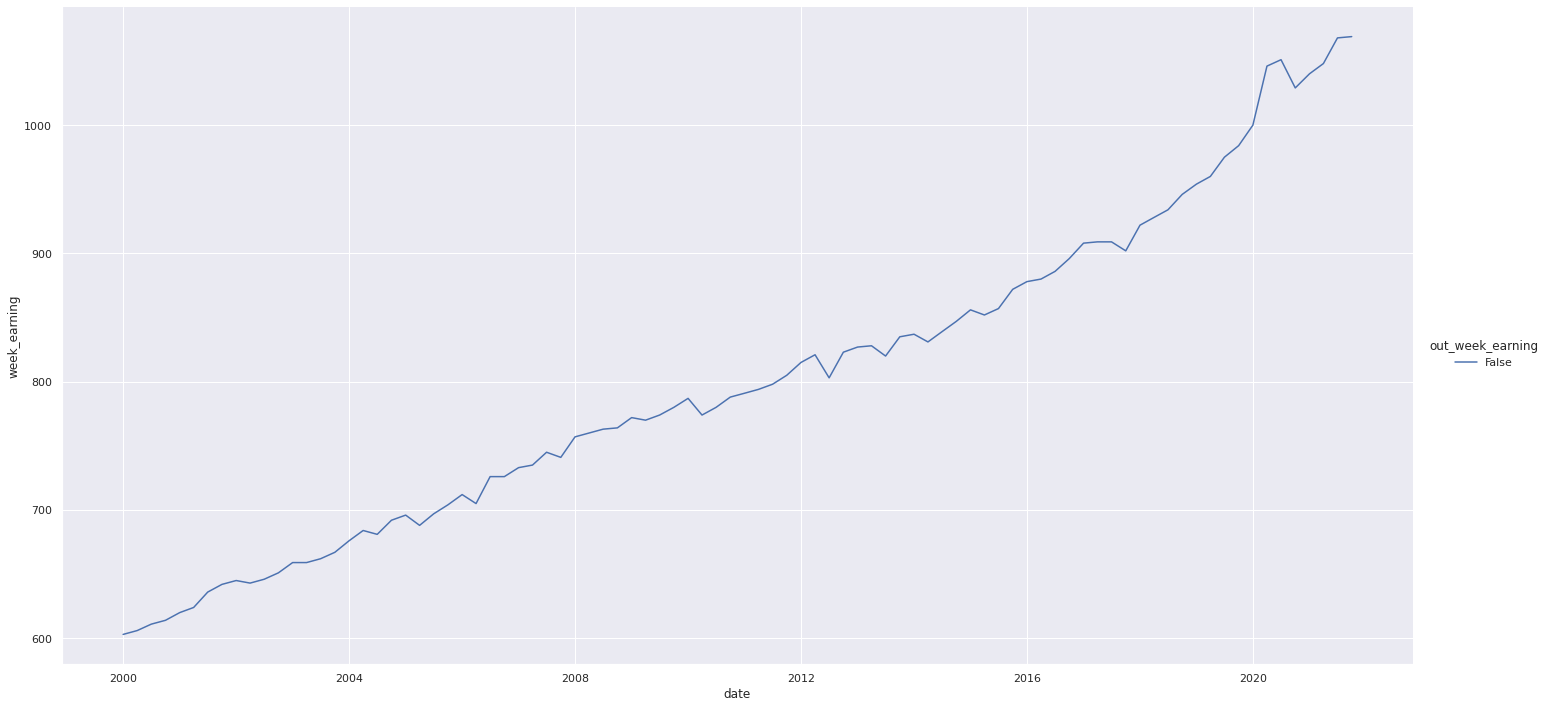

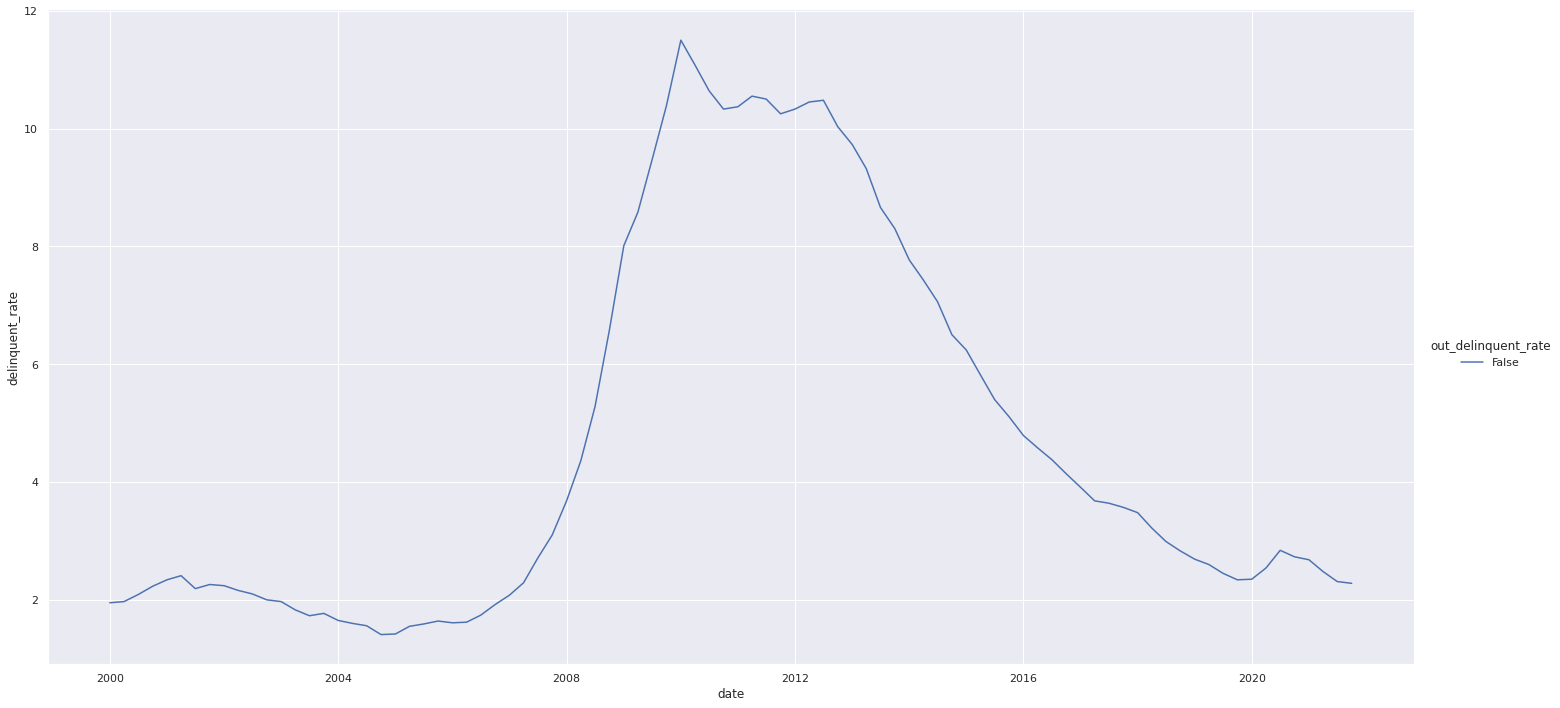

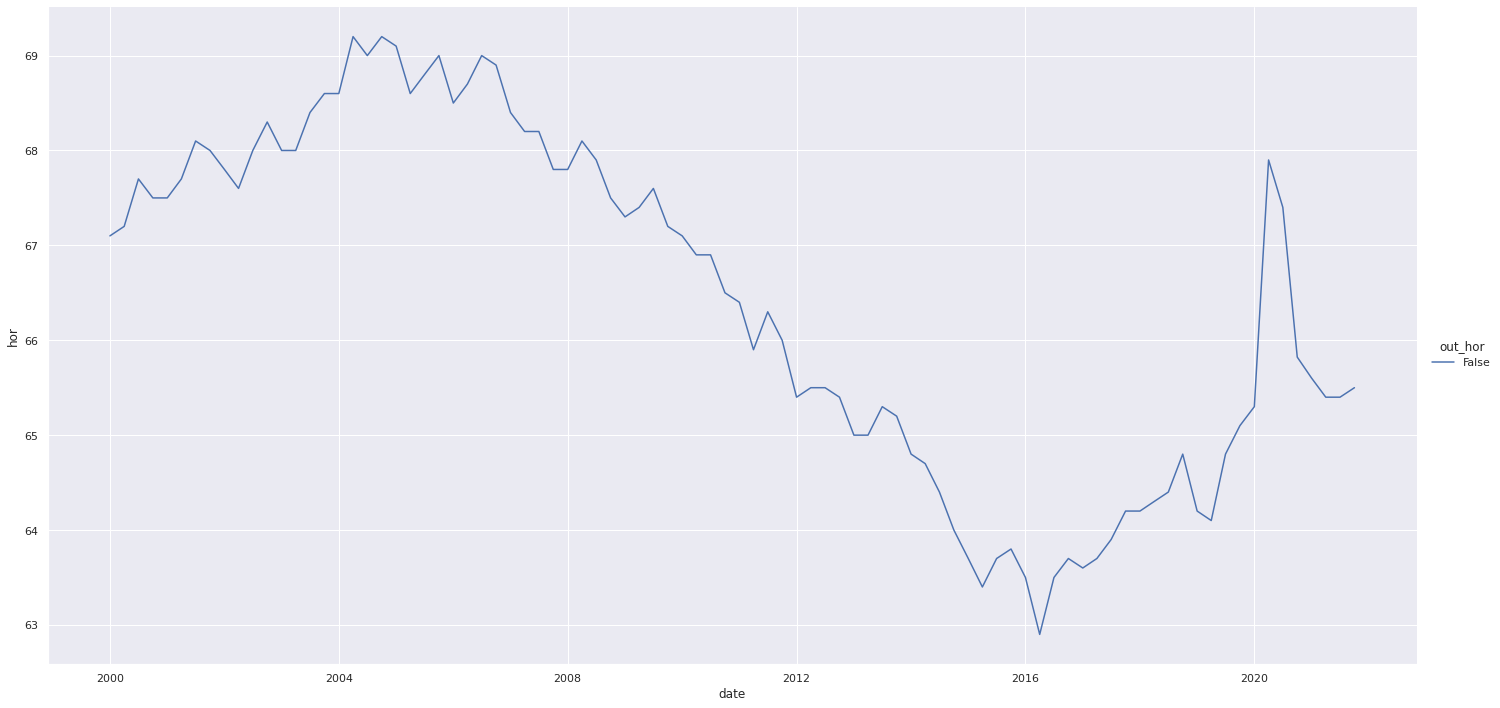

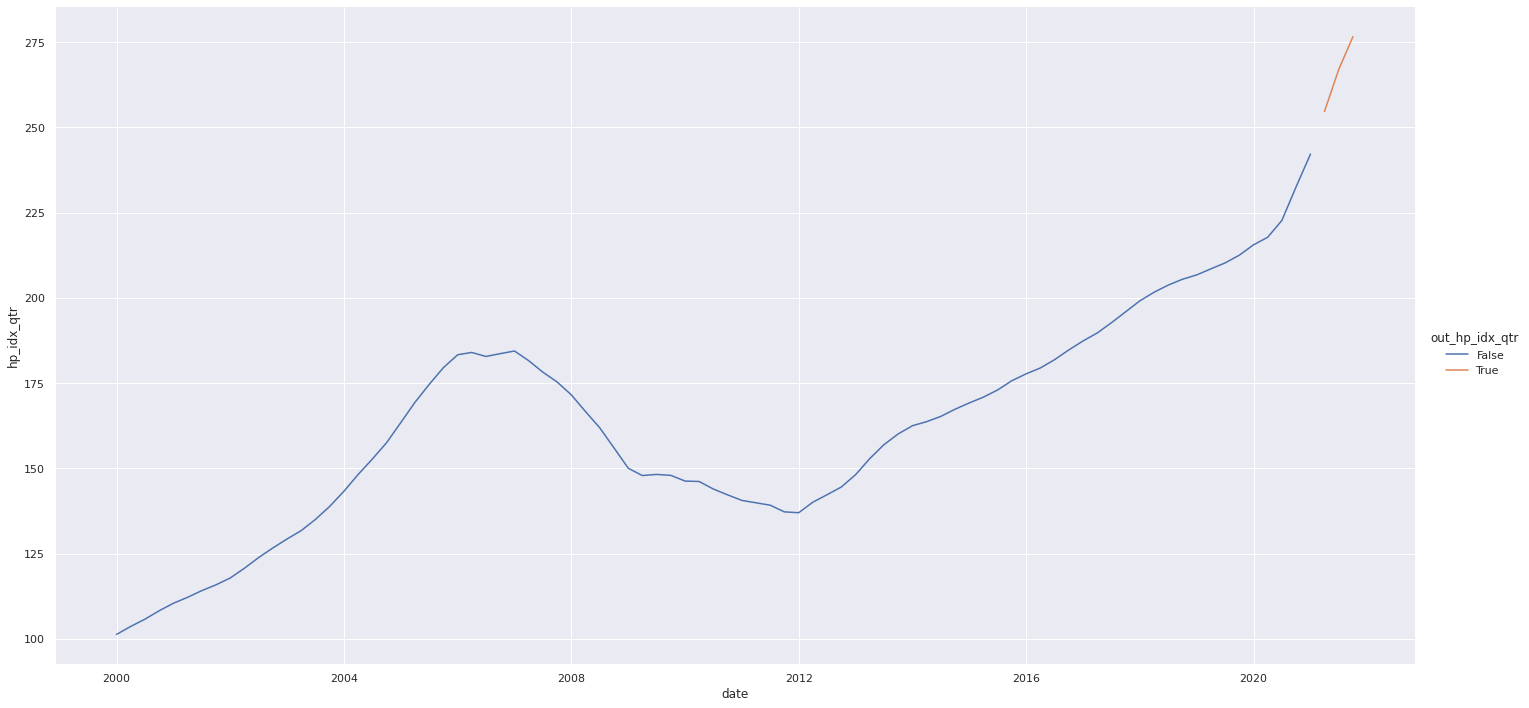

In [18]:
plt.close('all')
for col in x_qtr.columns:
    sns.relplot(data=x_qtr_out.reset_index(), x='date', y=col, hue='out_' + col, kind='line', height=10, aspect=2)

- __Outliers values are explainable as they occur arround 2008 recession or 2020 pandemic period.__

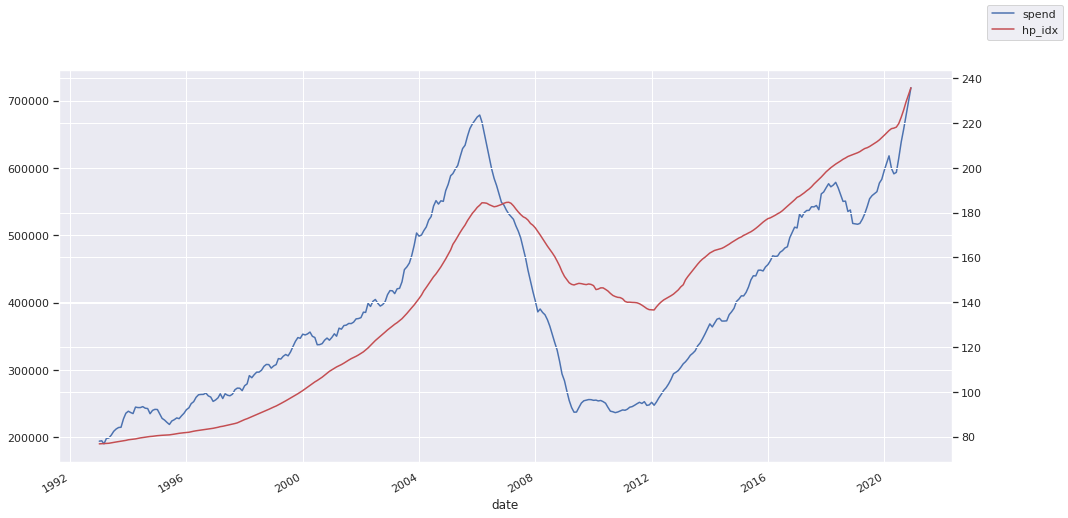

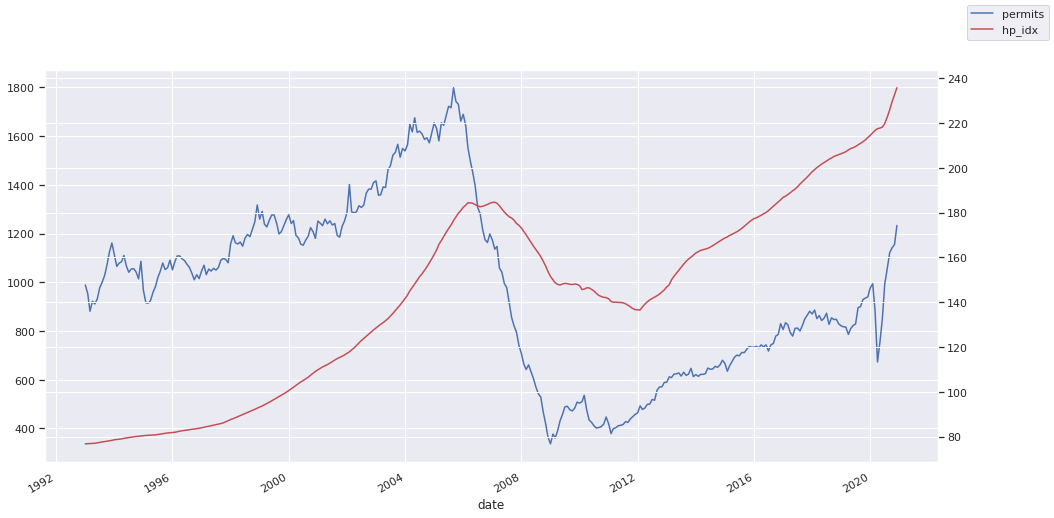

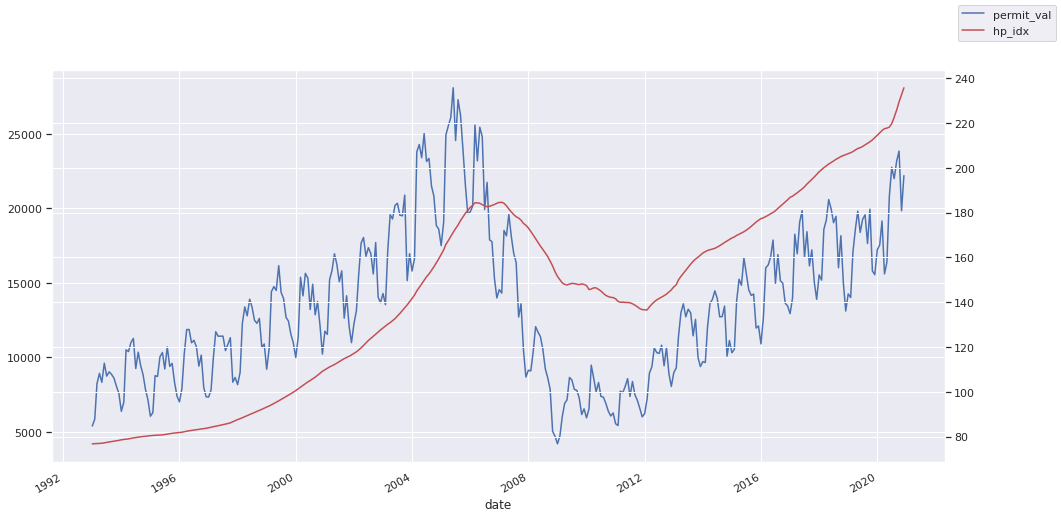

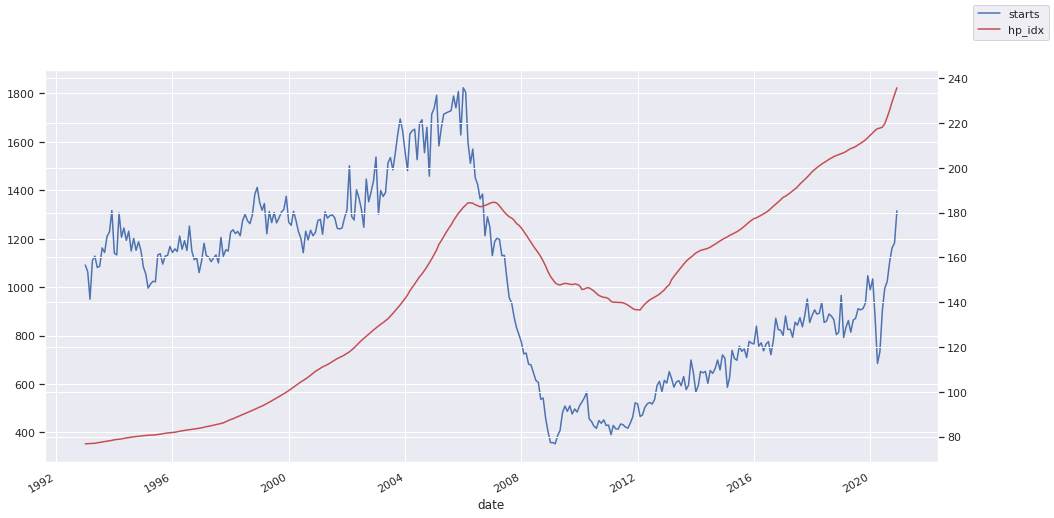

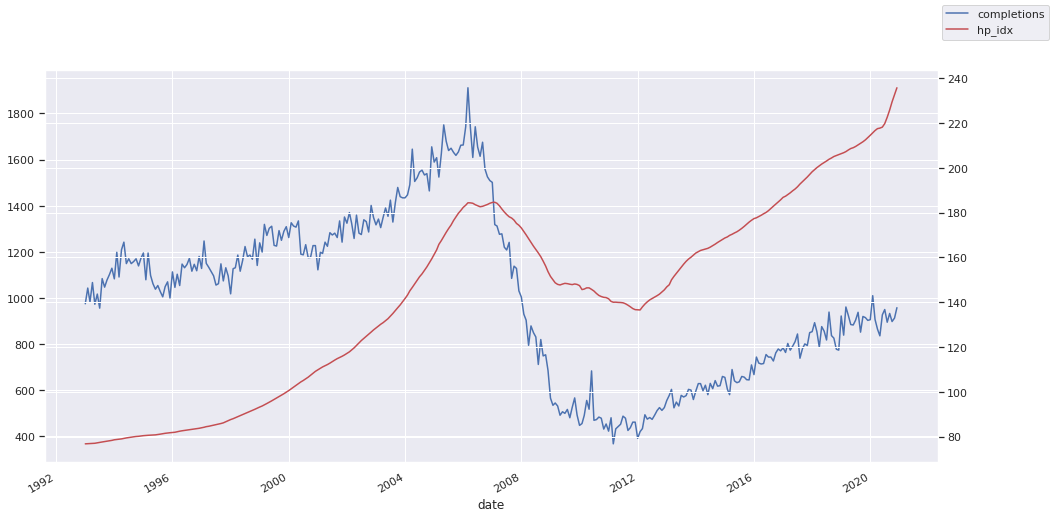

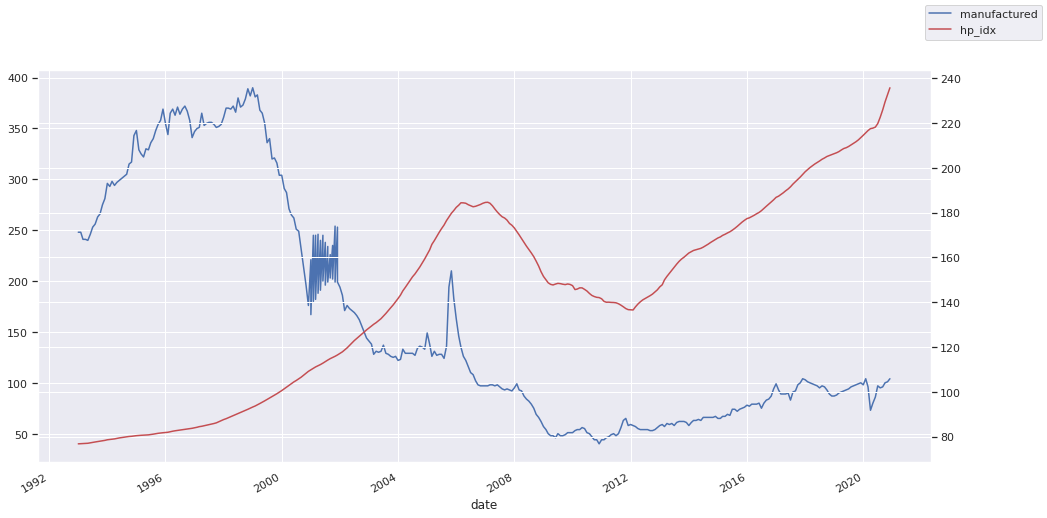

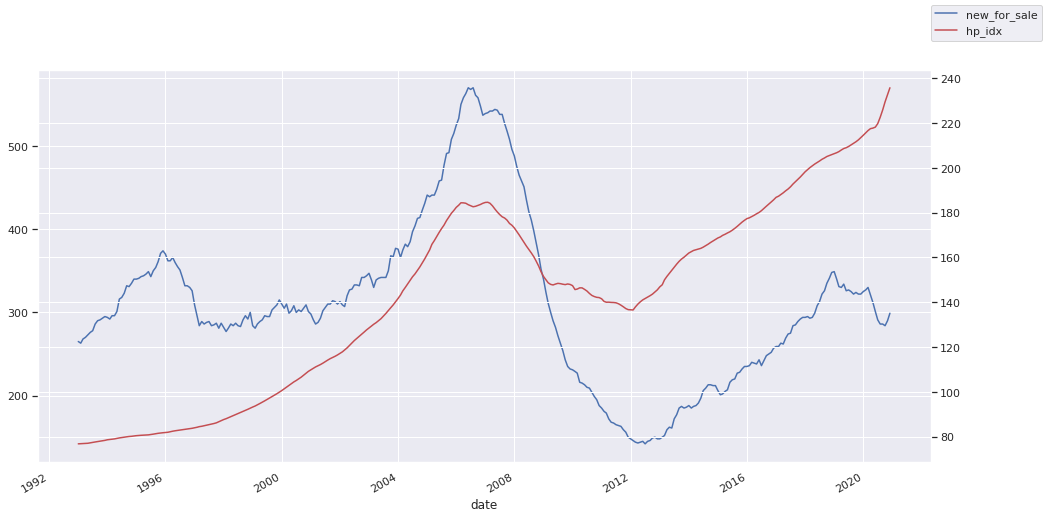

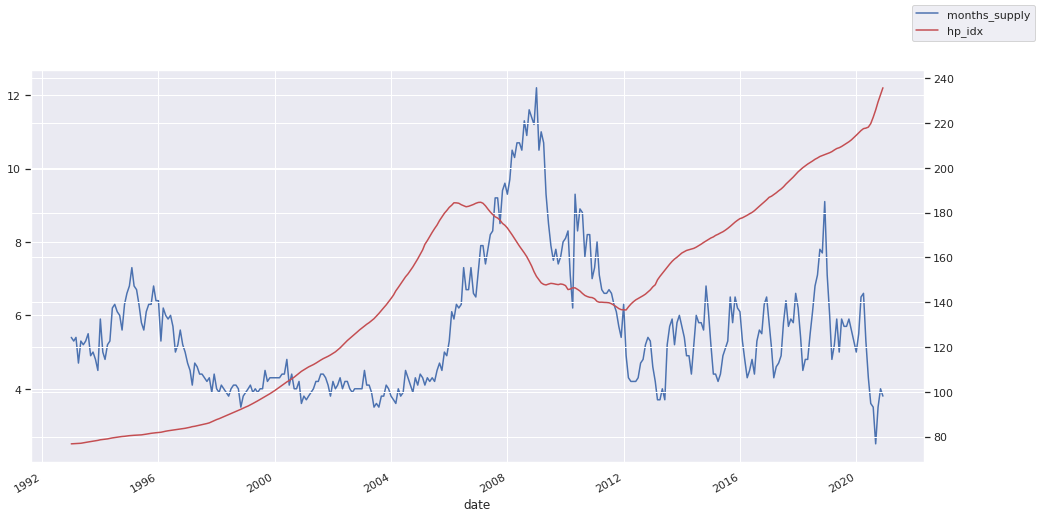

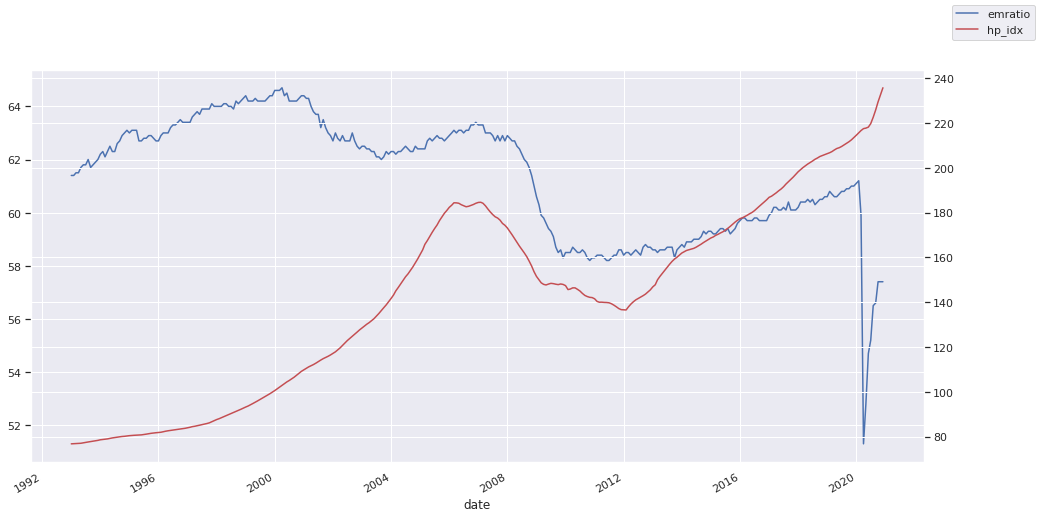

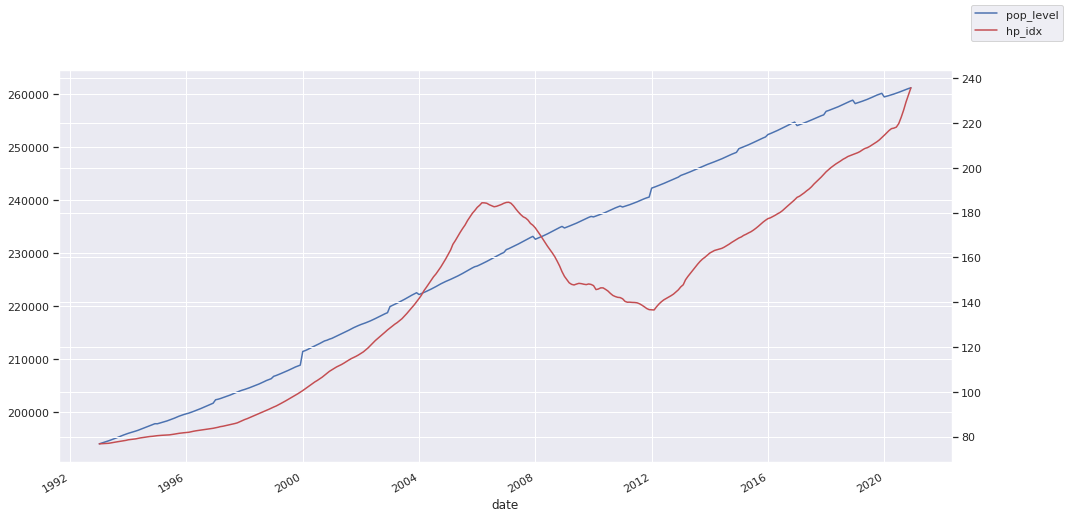

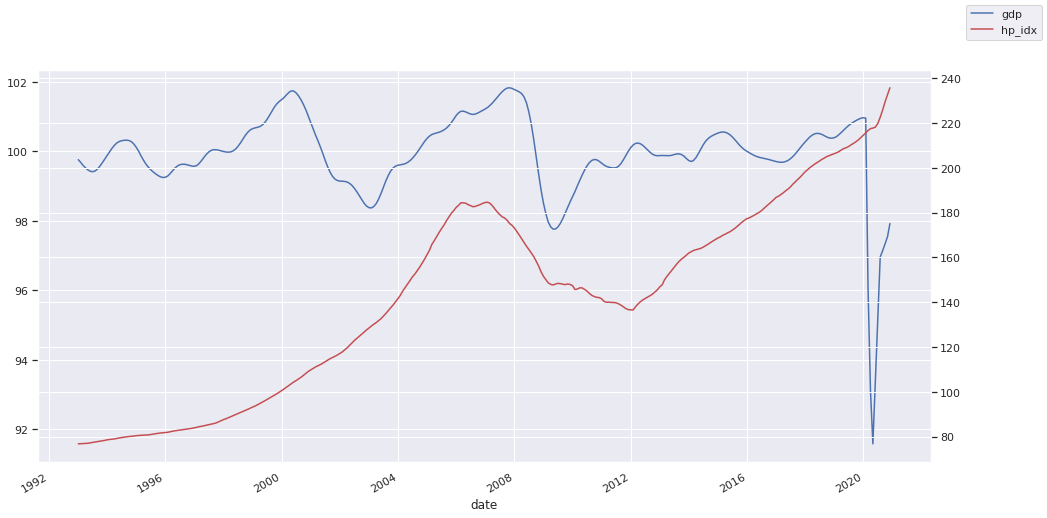

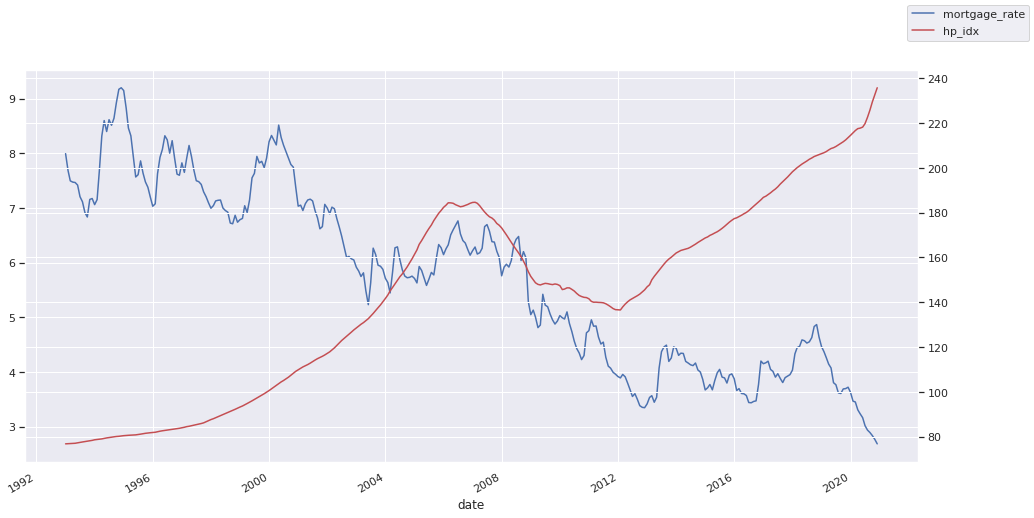

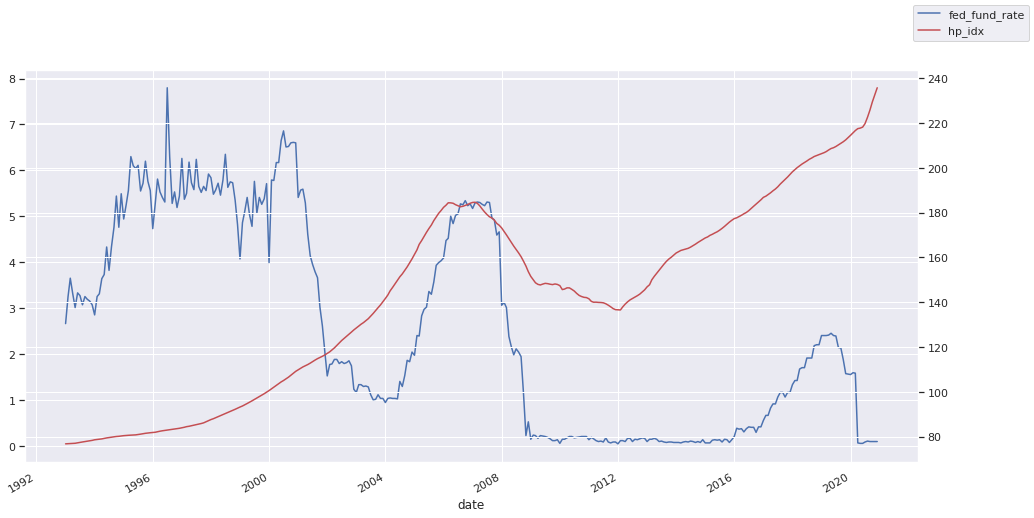

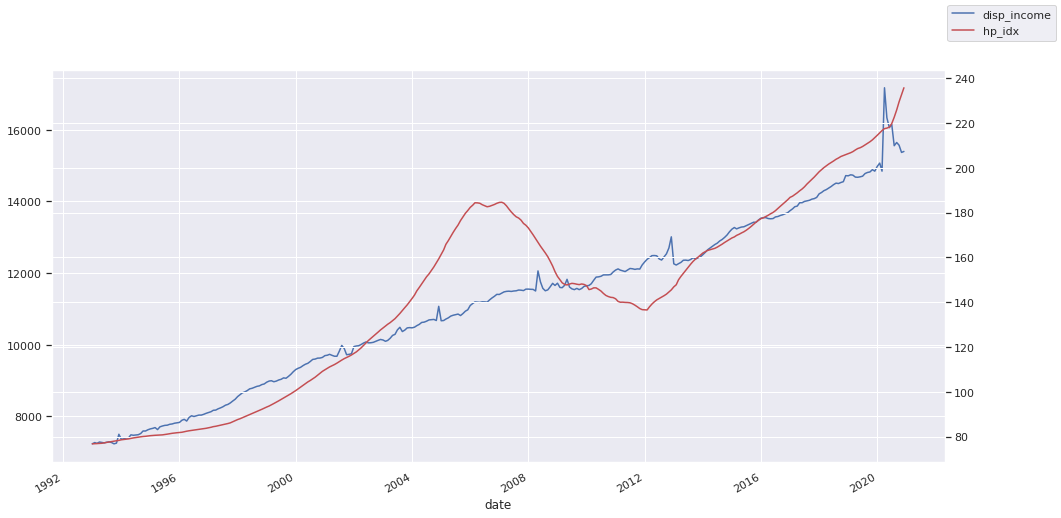

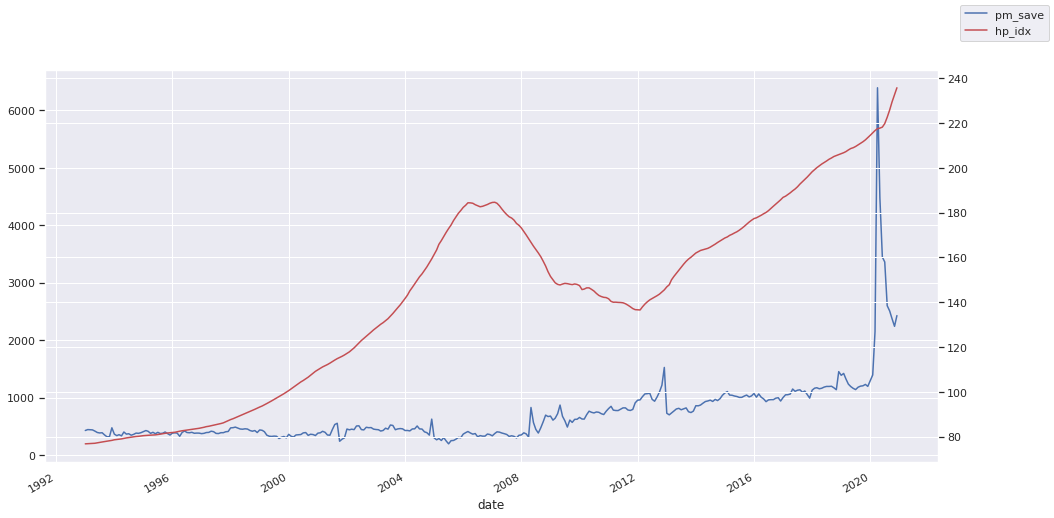

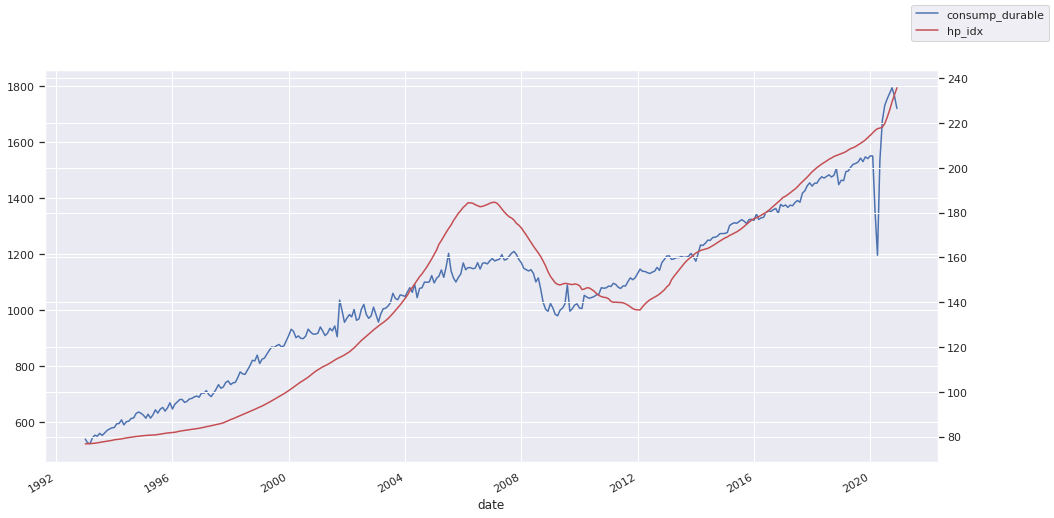

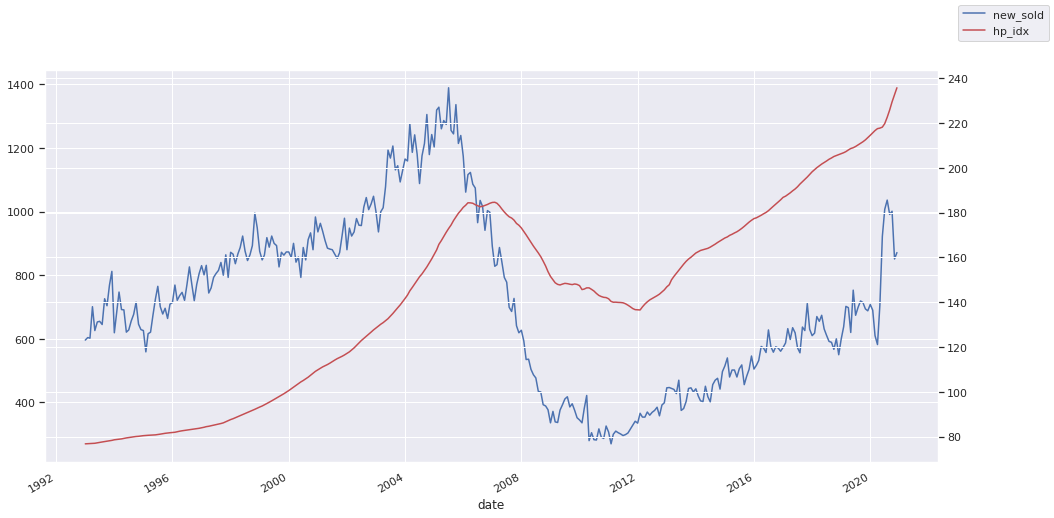

In [19]:
plt.close('all')
for col in x_mnth.columns[:-1]:    
    f, ax = plt.subplots(figsize=(16, 8))
    x_mnth.plot(y=col, legend=False, ax=ax)
    ax2 = ax.twinx()
    x_mnth.plot(y="hp_idx", ax=ax2, legend=False, color="r")
    ax.figure.legend()
    plt.show()

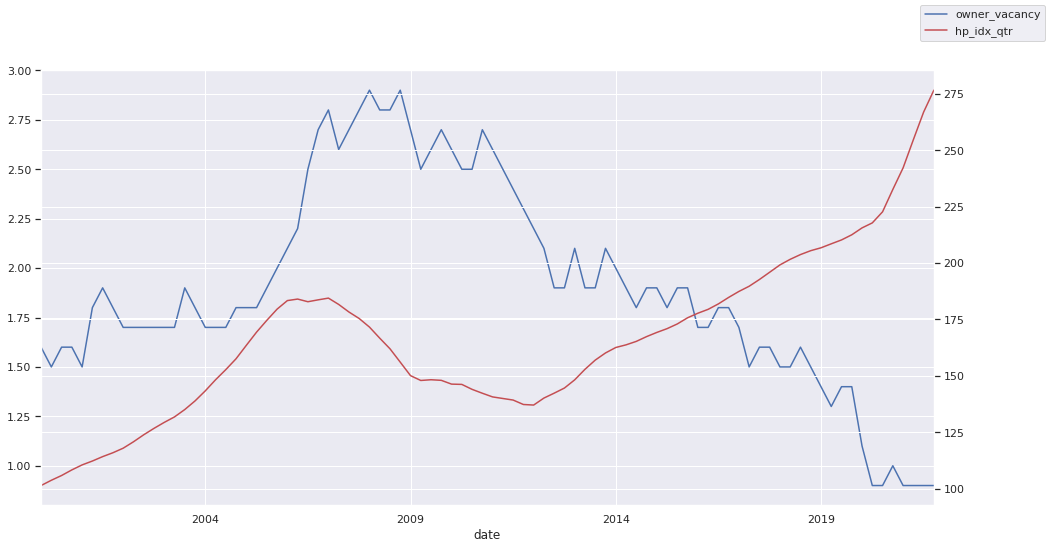

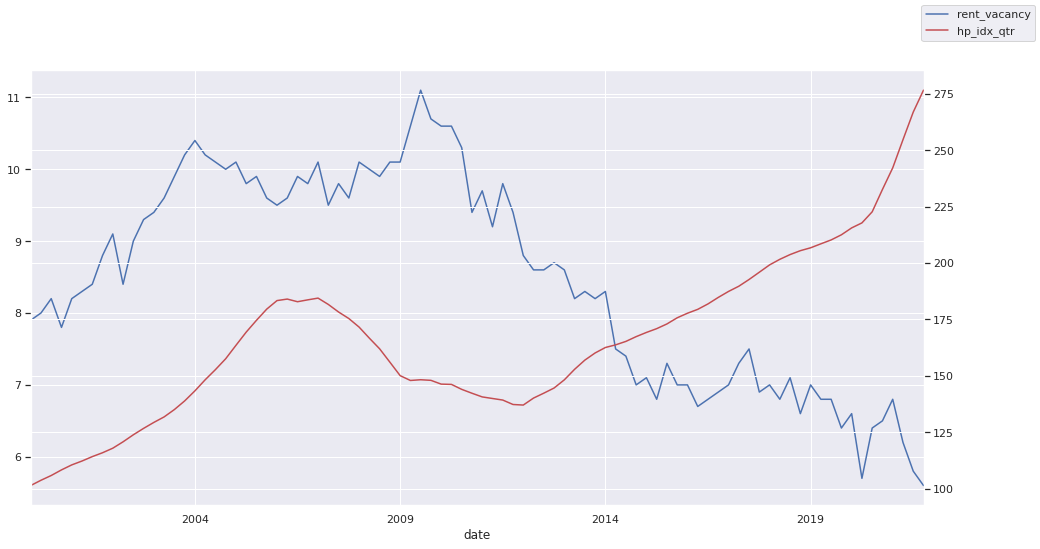

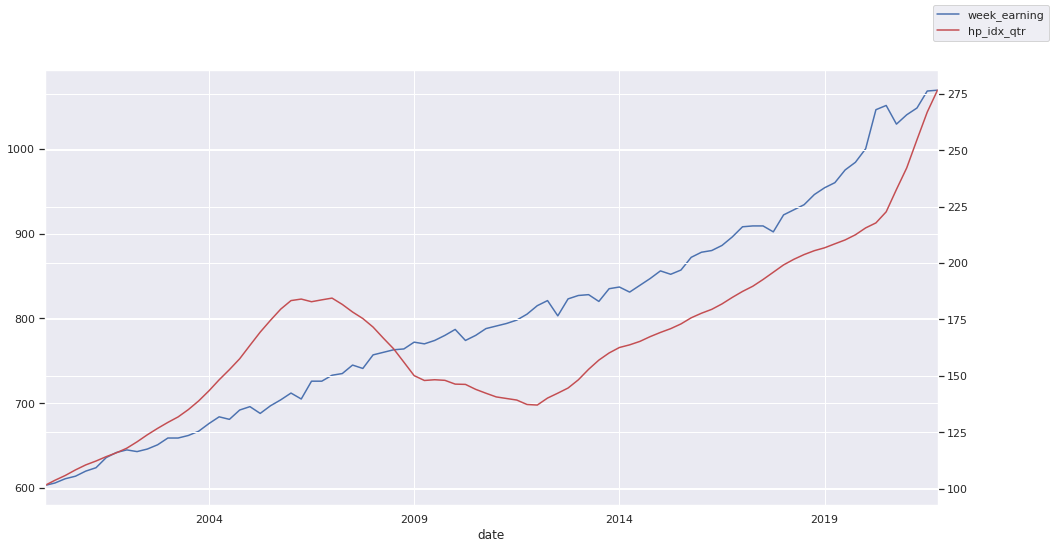

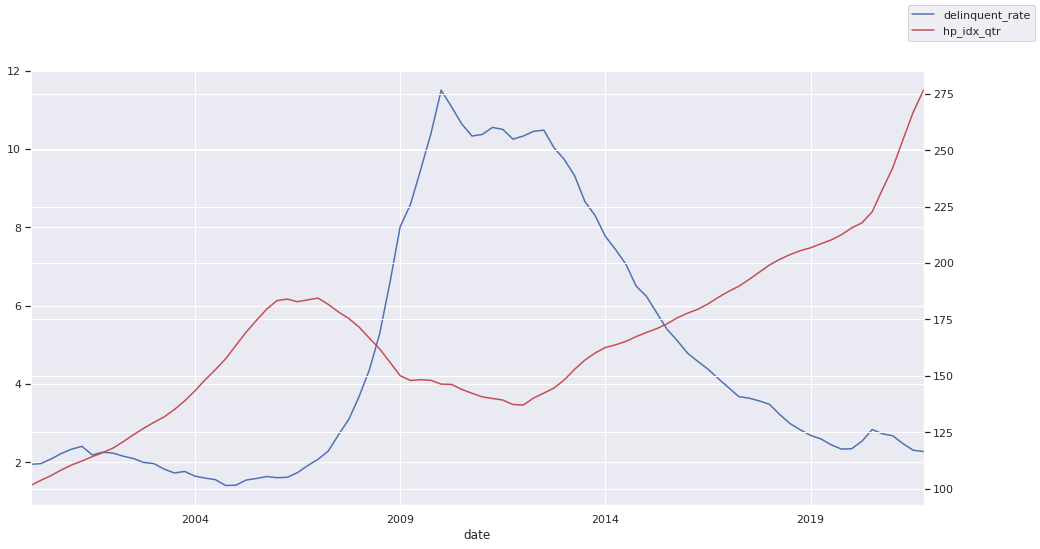

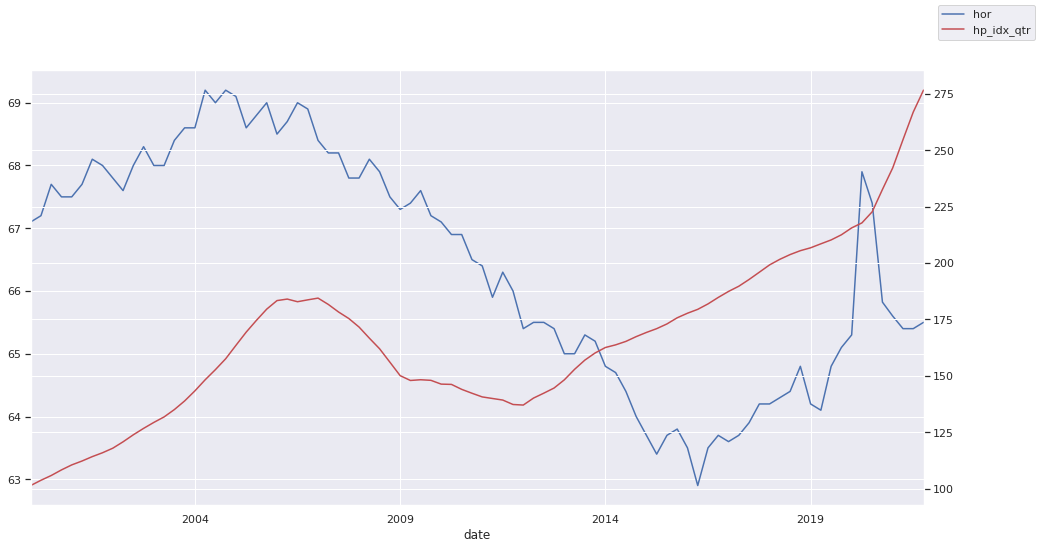

In [20]:
plt.close('all')
for col in x_qtr.columns[:-1]:    
    f, ax = plt.subplots(figsize=(16, 8))
    x_qtr.plot(y=col, legend=False, ax=ax)
    ax2 = ax.twinx()
    x_qtr.plot(y="hp_idx_qtr", ax=ax2, legend=False, color="r")
    ax.figure.legend()
    plt.show()

### Combining monthly and quarterly data

- I'll combine both datasets, by upsampling quarterly to monthly data, using linear interpolation (with two nearest neighbors) for missing data

In [21]:
x_qtr_monthly = x_qtr.resample('MS').interpolate(method='linear')
x_qtr_monthly.head()

owner_vacancy  rent_vacancy  week_earning  delinquent_rate  \
date                                                                     
2000-01-01       1.600000      7.900000    603.000000         1.950000   
2000-02-01       1.566667      7.933333    604.000000         1.956667   
2000-03-01       1.533333      7.966667    605.000000         1.963333   
2000-04-01       1.500000      8.000000    606.000000         1.970000   
2000-05-01       1.533333      8.066667    607.666667         2.010000   

                  hor  hp_idx_qtr  
date                               
2000-01-01  67.100000  101.339333  
2000-02-01  67.133333  102.117667  
2000-03-01  67.166667  102.896000  
2000-04-01  67.200000  103.674333  
2000-05-01  67.366667  104.378222

In [22]:
### join dataframes

x_monthly = x_mnth.join(x_qtr_monthly, how='inner')

In [23]:
### save for use
x_monthly.to_csv('./data/x_monthly.csv', index_label='date')

### Correlation Matrix

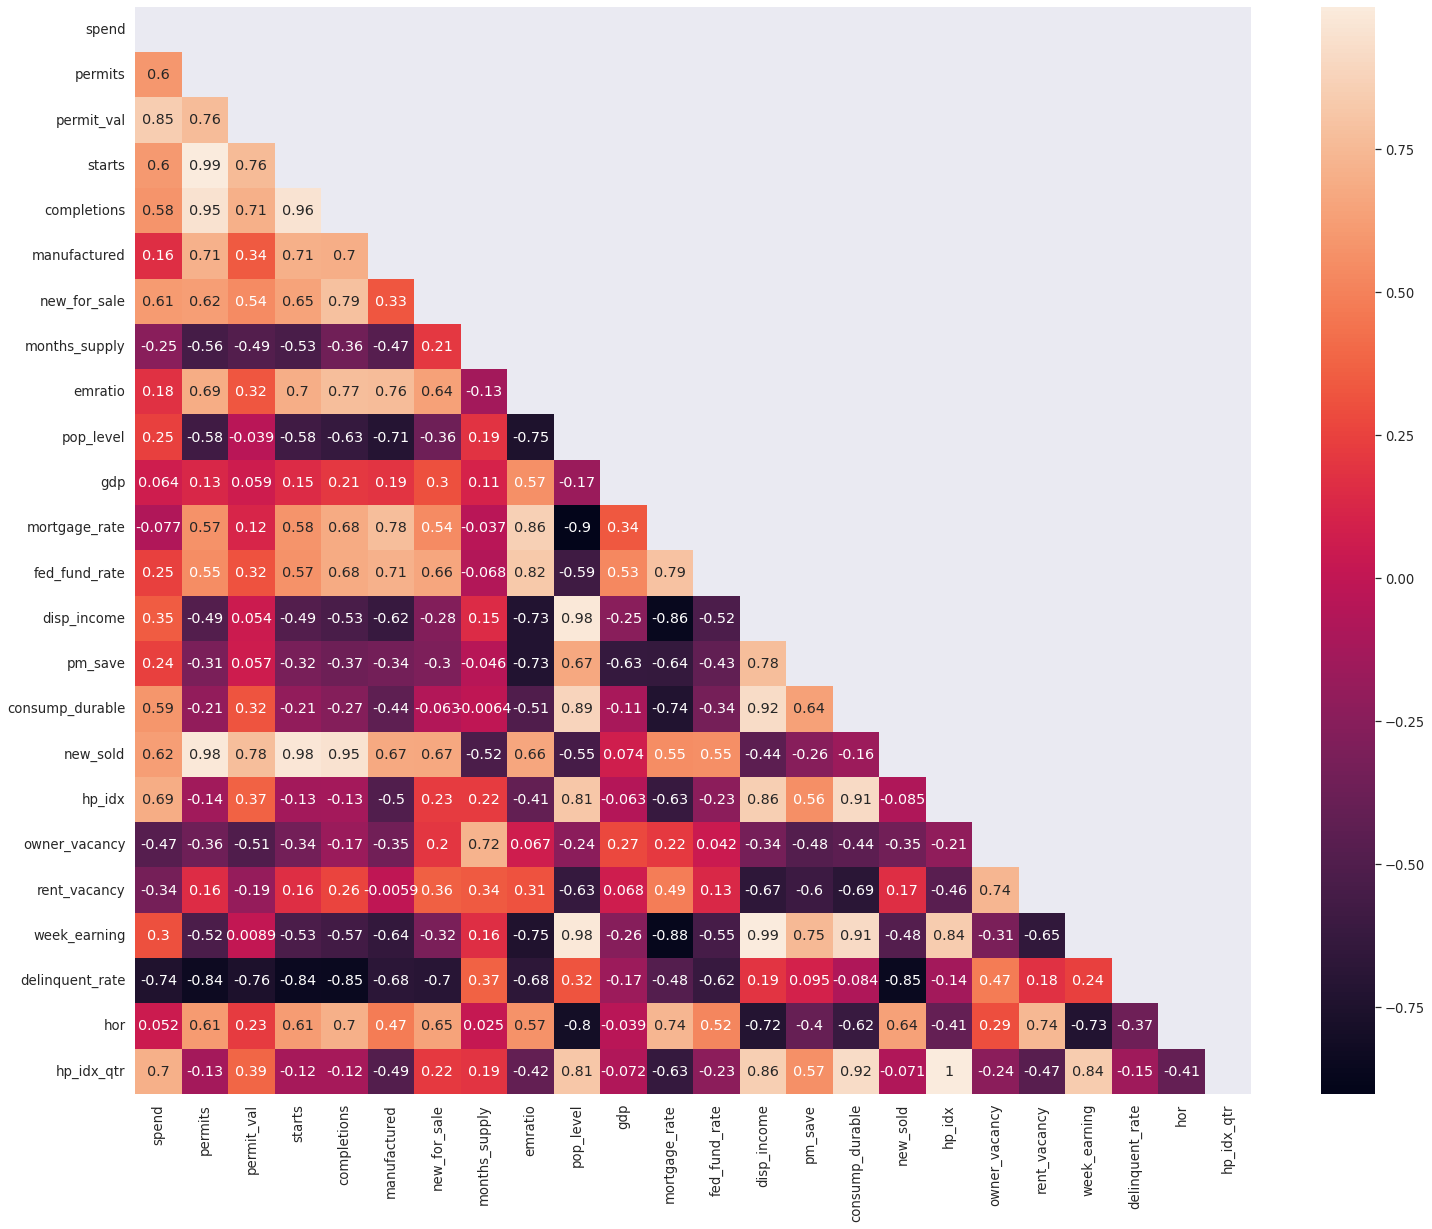

In [28]:
corr = x_monthly.corr()
mask = np.triu(corr)

sns.set(font_scale=1.2)
_, ax = plt.subplots(figsize=(25, 20))

p = sns.heatmap(corr,annot=True, ax=ax, mask=mask)


- We have features with high correlation:


- Permits, permit value, starts, completions 
- Disposable income, consumption, Population level, mortgage rate
- Permits, new house sold, starts, completions